<h3>Train CCS Predicting Models, Predict CCS Values of Metabolites, Compare Them</h3>

<h4>Import Data</h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
# Set plot fonts globally

mpl.rcParams['font.size'] = 14

mpl.rcParams['axes.titlesize'] = 16   # Title font size
mpl.rcParams['axes.labelsize'] = 14   # Axis label font size
mpl.rcParams['xtick.labelsize'] = 10  # X-axis tick label font size
mpl.rcParams['ytick.labelsize'] = 10  # Y-axis tick label font size
mpl.rcParams['legend.fontsize'] = 11  # Legend font size
mpl.rcParams['figure.titlesize'] = 18 # Figure title font size

In [4]:
ccs_df = pd.read_csv('/home/lbarbut/data/ccs/METLIN_IMS_all plot CV %3C2% _dimers.csv')
ccs_df

Molecule Name Molecular Formula  \
0      3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...        C19H22FN3O   
1      3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...        C22H15FO3S   
2      1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...        C25H28N4O3   
3      3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...       C22H30N4O5S   
4      2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...        C18H20N2O2   
...                                                  ...               ...   
65283                                                NaN               NaN   
65284                                                NaN               NaN   
65285                                                NaN               NaN   
65286                                                NaN               NaN   
65287                                                NaN               NaN   

       METLIN ID Precursor Adduct    CCS1    CCS2    CCS3  CCS_AVG  % CV  \
0      1181481.0    328.1820[M+H]  176.63  176.63  176.63   176.63   0.0   
1      1191359.0    379.0799[M+H]  192.26  192.26  192.26   192.26   0.0   
2      1228206.0    433.2234[M+H]  211.12  211.12  211.12   211.12   0.0   
3      1176932.0    463.2010[M+H]  204.22  204.22  204.22   204.22   0.0   
4      1183857.0    297.1598[M+H]  174.47  174.47  174.47   174.47   0.0   
...          ...              ...     ...     ...     ...      ...   ...   
65283        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65284        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65285        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65286        NaN              NaN     NaN     NaN     NaN      NaN   NaN   
65287        NaN              NaN     NaN     NaN     NaN      NaN   NaN   

            m/z  ...     m/z.1       Dimer  Dimer.1 dimer line    CCS  m/z.2  \
0      328.1820  ...  328.1820  209.886594  Monomer        NaN  135.0   50.0   
1      379.0799  ...  379.0799  223.588309  Monomer        NaN  310.0  700.0   
2      433.2234  ...  433.2234  238.163739  Monomer        NaN    NaN    NaN   
3      463.2010  ...  463.2010  246.233709  Monomer        NaN    NaN    NaN   
4      297.1598  ...  297.1598  201.535418  Monomer        NaN    NaN    NaN   
...         ...  ...       ...         ...      ...        ...    ...    ...   
65283       NaN  ...       NaN         NaN      NaN        NaN    NaN    NaN   
65284       NaN  ...       NaN         NaN     3825        NaN    NaN    NaN   
65285       NaN  ...       NaN         NaN    61457        NaN    NaN    NaN   
65286       NaN  ...       NaN         NaN      NaN        NaN    NaN    NaN   
65287       NaN  ...       NaN         NaN    65282        NaN    NaN    NaN   

        pubChem                                              inchi  \
0      25345055  InChI=1S/C19H22FN3O/c20-17-8-6-15(7-9-17)14-22...   
1           NaN  InChI=1S/C22H15FO3S/c23-19-10-11-21-20(13-19)2...   
2      17541371  InChI=1S/C25H28N4O3/c1-31-21-10-8-19(9-11-21)2...   
3      16295966  InChI=1S/C22H30N4O5S/c27-19(16-26-20(28)22(23-...   
4      17463671  InChI=1S/C18H20N2O2/c21-18(20-10-12-22-13-11-2...   
...         ...                                                ...   
65283        --                                                 --   
65284        --                                                 --   
65285        --                                                 --   
65286        --                                                 --   
65287        --                                                 --   

                                                  smiles  \
0                    O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2   
1      Fc1ccc2c(c1)C(=O)C(=Cc1ccc(cc1)c1ccccc1)CS2(=O)=O   
2      COc1ccc(cc1)c1noc(n1)CN1CCN(CC1)C(=O)C1(CCC1)c...   
3      O=C(N1CCN(CC1)S(=O)(=O)Cc1ccccc1)CN1C(=O)NC2(C...   
4                        O=C(N1CCOCC1)CNc1ccccc1c1ccccc1   
...                            

Debug Mode

In [5]:
debug_mode = False
if debug_mode:
    # Shuffle, because all first 1000 rows have precursor [M+H]+
    ccs_df = ccs_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Keep only the first 1000 rows
    ccs_df = ccs_df.iloc[:1000]

    # Reset the index (optional)
    ccs_df = ccs_df.reset_index(drop=True)


<h4>Data Preprocessing</h4>

In [6]:
# drop NaN Precusor Adduct rows
ccs_df = ccs_df.dropna(subset=['Precursor Adduct'])

# remove the m/z number before the Precursor Adduct since the info is also in m/z column
ccs_df.loc[:, 'Precursor Adduct'] = ccs_df['Precursor Adduct'].str.replace(r'[0-9.]+', '', regex=True)

# remove [M+Na] rows
ccs_df = ccs_df[ccs_df['Precursor Adduct'] != '[M+Na]']

# change [M+H] to [M+H]+ and [M-H] to [M-H]-
ccs_df["Precursor Adduct"] = ccs_df["Precursor Adduct"].replace({
    "[M+H]": "[M+H]+",
    "[M-H]": "[M-H]-"
})

In [7]:
print(ccs_df['Precursor Adduct'].value_counts())

Precursor Adduct
[M+H]+    28136
[M-H]-    19697
Name: count, dtype: int64


In [8]:
from rdkit import Chem

In [9]:
def is_valid_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles) is not None  # True if valid, False if invalid
    except Exception:
        return False


In [10]:
%%capture

# Apply validation
ccs_df["smiles_is_valid"] = ccs_df["smiles"].apply(is_valid_smiles)

invalid_smiles = ccs_df.loc[~ccs_df["smiles_is_valid"], "smiles"]  # Select invalid SMILES
# print("Invalid SMILES strings:")
# print(invalid_smiles.tolist())

# Filter out invalid SMILES, afterwards drop the is_valid column
ccs_df = ccs_df[ccs_df["smiles_is_valid"]].drop(columns=["smiles_is_valid"]).reset_index(drop=True)

In [11]:
# drop NaN CCS_AVG rows
ccs_df = ccs_df.dropna(subset=['CCS_AVG'])
ccs_df.shape

(44407, 21)

In [12]:
ccs_df["Instrument_type"] = "timsTOF"

In [13]:
ccs_df['CE'] = -1

<h4>Use Fiora To Predict CCS Values of Metabolites</h4>

In [14]:
%%capture
# Create Metabolite column by Creating Molecular Graphs of Metabolites

from fiora.MOL.Metabolite import Metabolite
from fiora.GNN.AtomFeatureEncoder import AtomFeatureEncoder
from fiora.GNN.BondFeatureEncoder import BondFeatureEncoder
from fiora.GNN.SetupFeatureEncoder import SetupFeatureEncoder

CE_upper_limit = 100.0
weight_upper_limit = 1000.0

ccs_df["Metabolite"] = ccs_df["smiles"].apply(Metabolite)
ccs_df["Metabolite"].apply(lambda x: x.create_molecular_structure_graph())

node_encoder = AtomFeatureEncoder(feature_list=["symbol", "num_hydrogen", "ring_type"])
bond_encoder = BondFeatureEncoder(feature_list=["bond_type", "ring_type"])
setup_encoder = SetupFeatureEncoder(feature_list=["collision_energy", "molecular_weight", "precursor_mode", "instrument"])
rt_encoder = SetupFeatureEncoder(feature_list=["molecular_weight", "precursor_mode", "instrument"])

setup_encoder.normalize_features["collision_energy"]["max"] = CE_upper_limit 
setup_encoder.normalize_features["molecular_weight"]["max"] = weight_upper_limit 
rt_encoder.normalize_features["molecular_weight"]["max"] = weight_upper_limit 

ccs_df["Metabolite"].apply(lambda x: x.compute_graph_attributes(node_encoder, bond_encoder))

In [15]:
# Assign unique Metabolite identifiers
print("Unique smiles: " + str(len(ccs_df["smiles"].unique())))

metabolite_id_map = {}
for metabolite in ccs_df["Metabolite"]:
    is_new = True
    for id, other in metabolite_id_map.items():
        if metabolite == other:
            metabolite.set_id(id)
            is_new = False
            break
    if is_new:
        new_id = len(metabolite_id_map)
        metabolite.id = new_id
        metabolite_id_map[new_id] = metabolite

ccs_df["group_id"] = ccs_df["Metabolite"].apply(lambda x: x.get_id())
ccs_df["num_per_group"] = ccs_df["group_id"].map(ccs_df["group_id"].value_counts())

for i, data in ccs_df.iterrows():
    data["Metabolite"].set_loss_weight(1.0 / data["num_per_group"])
ccs_df["loss_weight"] = ccs_df["Metabolite"].apply(lambda x: x.loss_weight)

def print_df_stats(df):
    num_spectra = df.shape[0]
    num_ids = len(df["group_id"].unique())
    
    print(f"Dataframe stats: {num_spectra} spectra covering {num_ids} unique structures")

print_df_stats(ccs_df)

Unique smiles: 27334
Dataframe stats: 44407 spectra covering 27326 unique structures


In [16]:
ccs_df.apply(lambda x: x["Metabolite"].set_id(x["group_id"]), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
44402    None
44403    None
44404    None
44405    None
44406    None
Length: 44407, dtype: object

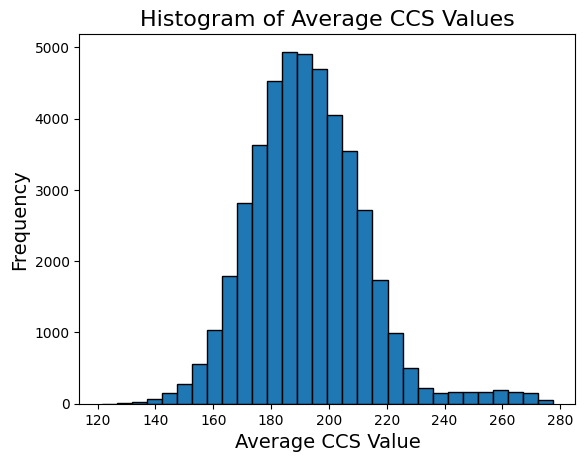

In [17]:
# Plot histogram of CCS_AVG column

plt.hist(ccs_df['CCS_AVG'], bins=30, edgecolor='black')
plt.xlabel('Average CCS Value')
plt.ylabel('Frequency')
plt.title('Histogram of Average CCS Values')
plt.show()

<h5>Predict CCS Values</h5>

In [18]:
import torch
import torch.nn.init as init
import torch.nn as nn
from fiora.GNN.GNNModules import GNNCompiler
from fiora.MS.SimulationFramework import SimulationFramework
from contextlib import contextmanager
from torch.func import functional_call

LoRa

In [19]:
def _freeze_as_leaf_(module):
    for name, p in list(module._parameters.items()):
        if p is None: continue
        module._parameters[name] = nn.Parameter(p.detach(), requires_grad=False)
    for child in module.children():
        _freeze_as_leaf_(child)

In [20]:
# Create a wrapper class to add trainable LoRA-like deltas to a frozen model
class FinetuneFioraWrapper(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.model = base_model
        _freeze_as_leaf_(self.model)  # sets all base params to leaf, requires_grad=False
        
        # Pass through model_params for compatibility with PropertyTrainer
        self.model_params = base_model.model_params

        # Create trainable deltas (same shape as each base parameter)
        self.deltas = nn.ParameterList([
            nn.Parameter(torch.zeros_like(p, device=p.device, dtype=p.dtype, requires_grad=True))
            for p in self.model.parameters()
        ])

    def parameters(self, recurse: bool = True):
        """Override to return only the trainable deltas"""
        return self.deltas

    def named_parameters(self, prefix: str = '', recurse: bool = True):
        """Override to return only the trainable deltas"""
        base_names = [n for n, _ in self.model.named_parameters()]
        return [(f"{prefix}delta.{n}", d) for n, d in zip(base_names, self.deltas)]
    @contextmanager
    def apply_deltas(self):
        # clone original weights
        originals = [p.detach().clone() for p in self.model.parameters()]
        # add deltas to original params
        for p, d in zip(self.model.parameters(), self.deltas):
            p.add_(d)
        yield
        with torch.no_grad():
            # restore each p.data back to its original value
            for p, o in zip(self.model.parameters(), originals):
                p.data.copy_(o)

    def forward(self, *args, **kwargs):
        # Build a mapping from *base* param name -> *effective* param tensor
        perturbed = {
            name: p + d
            for (name, p), d in zip(self.model.named_parameters(), self.deltas) # p here is frozen and wont get grads, self.model is the base_model
        }
        # Call the frozen backbone *statelessly* with those effective params
        return functional_call(self.model, perturbed, args=args, kwargs=kwargs) # temporarily use perturbed weights just for this forward, after this backbone (self.model) still holds the original frozen tensors
    
    def save(self, path: str):
        """
        Called by PropertyTrainer when it wants to checkpoint.
        """
        # just dump the state dict
        torch.save(self.model.state_dict(), path)


In [21]:
# Load best model

dev="cuda:0"
#MODEL_PATH = f"{home}/data/metabolites/pretrained_models/pre_package/v0.0.1_merged_depth6_Jan24.pt"
MODEL_PATH = "/home/lbarbut/models/ccs_models/v0.0.1_merged_depth6_Aug24_sqrt+CCS+RT_drop3.pt" # New sqrt model (improved)

try:
    base_model= GNNCompiler.load_from_state_dict(MODEL_PATH)
    print("Model loaded from state dict without errors.")
except:
    raise NameError("Error: Failed loading from state dict.")
        

base_model.eval()
base_model = base_model.to(dev)

base_model.model_params

spectral_modules = ["node_embedding", "edge_embedding", "GNN_module", "edge_module", "precursor_module", "RT_module"]
# for module in spectral_modules:
#     base_model.freeze_submodule(module)

for name, param in base_model.named_parameters():
    if param.requires_grad:print(f"{name}: requires gradients")

Model loaded from state dict without errors.
CCS_module.dense_layers.0.weight: requires gradients
CCS_module.dense_layers.0.bias: requires gradients
CCS_module.dense_layers.1.weight: requires gradients
CCS_module.dense_layers.1.bias: requires gradients
CCS_module.output_layer.weight: requires gradients
CCS_module.output_layer.bias: requires gradients


In [22]:
# Reset and randomize model weights

def reset_weights_and_xavier_init(model: torch.nn.Module):
    for name, module in model.named_modules():
        if hasattr(module, 'reset_parameters'):
            try:
                module.reset_parameters()
                print(f"Reset: {name} ({module.__class__.__name__})")
            except Exception as e:
                print(f"Failed to reset: {name} ({module.__class__.__name__}) — {e}")

        if isinstance(module, torch.nn.Linear):
            init.xavier_uniform_(module.weight)
            print(f"Xavier initialized: {name}.weight")
            if module.bias is not None:
                init.zeros_(module.bias)


In [23]:
#reset_weights_and_xavier_init(base_model)

In [24]:
# Check model content

print("Check model content:")
print(base_model)
print("=========================")
for name, module in base_model.named_modules():
    print(name, "->", module.__class__.__name__)
print("=========================")
for name, param in base_model.named_parameters():
    print(f"{name} | shape: {param.shape} | requires_grad: {param.requires_grad}")

print("Checked Model")

Check model content:
GNNCompiler(
  (node_embedding): FeatureEmbedding(
    (embeddings): ModuleList(
      (0): Embedding(10, 100)
      (1-2): 2 x Embedding(5, 100)
    )
  )
  (edge_embedding): FeatureEmbedding(
    (embeddings): ModuleList(
      (0): Embedding(4, 150)
      (1): Embedding(5, 150)
    )
  )
  (GNN_module): GNN(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.2, inplace=False)
    (latent_dropout): Dropout(p=0.1, inplace=False)
    (graph_layers): ModuleList(
      (0-5): 6 x RGCNConv(300, 300, num_relations=4)
    )
  )
  (edge_module): EdgePredictor(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.2, inplace=False)
    (latent_dropout): Dropout(p=0.1, inplace=False)
    (dense_layers): ModuleList(
      (0-1): 2 x Linear(in_features=909, out_features=909, bias=True)
    )
    (output_layer): Linear(in_features=909, out_features=10, bias=True)
  )
  (precursor_module): GraphPredictor(
    (activation): ELU(alpha=1.0)
    (input_d

In [25]:
for name, param in base_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: requires gradients")
    else:
        print(f"{name}: does not require gradients (frozen)")

node_embedding.embeddings.0.weight: does not require gradients (frozen)
node_embedding.embeddings.1.weight: does not require gradients (frozen)
node_embedding.embeddings.2.weight: does not require gradients (frozen)
edge_embedding.embeddings.0.weight: does not require gradients (frozen)
edge_embedding.embeddings.1.weight: does not require gradients (frozen)
GNN_module.graph_layers.0.weight: does not require gradients (frozen)
GNN_module.graph_layers.0.root: does not require gradients (frozen)
GNN_module.graph_layers.0.bias: does not require gradients (frozen)
GNN_module.graph_layers.1.weight: does not require gradients (frozen)
GNN_module.graph_layers.1.root: does not require gradients (frozen)
GNN_module.graph_layers.1.bias: does not require gradients (frozen)
GNN_module.graph_layers.2.weight: does not require gradients (frozen)
GNN_module.graph_layers.2.root: does not require gradients (frozen)
GNN_module.graph_layers.2.bias: does not require gradients (frozen)
GNN_module.graph_layer

<h5>Include Metadata</h5>

In [26]:
def count_rings(smiles):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to RDKit molecule
    if mol is None:
        return 0
    return len(Chem.GetSSSR(mol))  # Get ring count

ccs_df["ring_count"] = ccs_df["smiles"].apply(count_rings)

In [27]:
import re
import fiora.MOL.constants

# Do rare elements (usually heavier) cause worse predictions?

def rare_element_included_smiles(smiles):
    rare_elements = fiora.MOL.constants.RARE_ELEMENTS
    
    return any(re.search(rf'\b{elem}\b', smiles) for elem in rare_elements)

In [28]:
# Collect all unique elements across all metabolites in the DataFrame

metabolite_series = ccs_df['Metabolite']
all_unique_elements_set = set()
for metabolite in metabolite_series:
    elements = metabolite.node_elements
    all_unique_elements_set.update(elements)


In [29]:
ccs_df['rare_element_included'] = ccs_df["smiles"].apply(lambda x: rare_element_included_smiles(x))
ccs_df['abs_elem_distr_vec'] = ccs_df["Metabolite"].apply(lambda x: Metabolite.calc_abs_elem_distr_vec(x, all_unique_elements_set))

In [30]:
metadata_key = { "collision_energy":  "CE", 
                 "instrument": "Instrument_type",
                 "precursor_mz": "m/z", 
                 'precursor_mode': "Precursor Adduct",
                 "ccs": "CCS_AVG"
                 }

ccs_df["summary"] = ccs_df.apply(lambda x: {key: x[name] for key, name in metadata_key.items()}, axis=1)
ccs_df.apply(lambda x: x["Metabolite"].add_metadata(x["summary"], setup_encoder, rt_encoder), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_loss_weight(x["loss_weight"]), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_precursor_positive(x["Precursor Adduct"]), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_ring_count(x["ring_count"]), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_presence_rare_elements(x["rare_element_included"]), axis=1)
ccs_df.apply(lambda x: x["Metabolite"].set_elem_distr_vec(x["abs_elem_distr_vec"]), axis=1)

ccs_df["geo_data"] = ccs_df["Metabolite"].apply(lambda x: x.as_geometric_data(with_labels=False, ccs_only=True).to(dev)).values

In [31]:
def extract_molecular_weight(summary_dict):
    """
    Extracts the 'molecular_weight' value from a dictionary.

    Args:
        summary_dict (dict): A dictionary containing molecular weight information.

    Returns:
        float: The molecular weight, or None if the key is not found.
    """
    if isinstance(summary_dict, dict):  # Check if the input is a dictionary
        return summary_dict.get('molecular_weight')  # Use .get() to avoid KeyError
    else:
        return None 

ccs_df["weights"] = ccs_df["summary"].apply(extract_molecular_weight)

In [32]:
weights = [item.weight for item in ccs_df["geo_data"]]

ccs_df["weights"] = weights



In [33]:
ccs_df["Precursor Adduct"]

0        [M+H]+
1        [M+H]+
2        [M+H]+
3        [M+H]+
4        [M+H]+
          ...  
44402    [M-H]-
44403    [M-H]-
44404    [M-H]-
44405    [M-H]-
44406    [M-H]-
Name: Precursor Adduct, Length: 44407, dtype: object

In [34]:
ccs_df.columns

Index(['Molecule Name', 'Molecular Formula', 'METLIN ID', 'Precursor Adduct',
       'CCS1', 'CCS2', 'CCS3', 'CCS_AVG', '% CV', 'm/z', 'Adduct', 'm/z.1',
       'Dimer', 'Dimer.1', 'dimer line', 'CCS', 'm/z.2', 'pubChem', 'inchi',
       'smiles', 'InChIKEY', 'Instrument_type', 'CE', 'Metabolite', 'group_id',
       'num_per_group', 'loss_weight', 'ring_count', 'rare_element_included',
       'abs_elem_distr_vec', 'summary', 'geo_data', 'weights'],
      dtype='object')

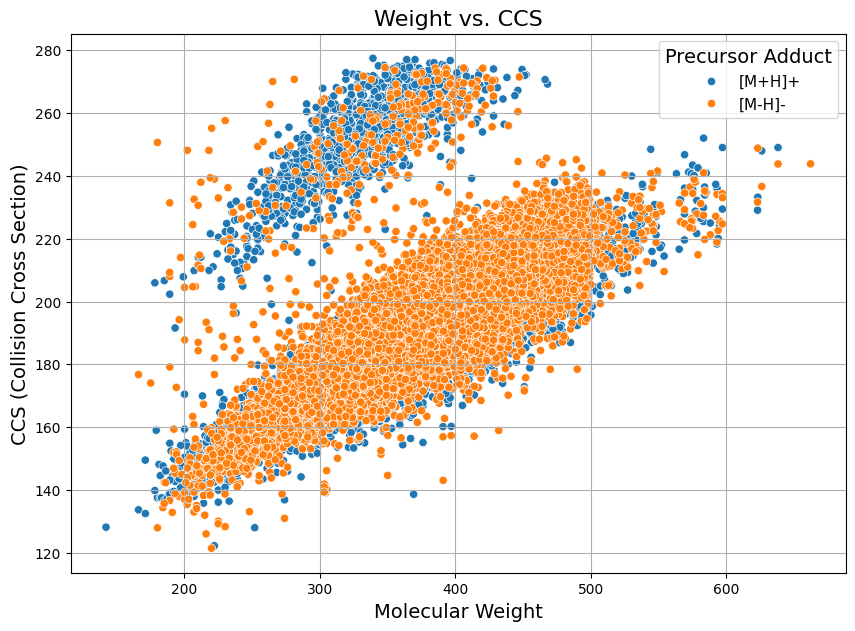

In [35]:
import torch
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=ccs_df, x='weights', y='CCS_AVG', hue='Precursor Adduct', palette='tab10'
)
plt.xlabel("Molecular Weight")
plt.ylabel("CCS (Collision Cross Section)")
plt.title("Weight vs. CCS")
plt.grid(True)
plt.show()


In [36]:
# Seperate Clusters

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Standardize the data
X = ccs_df[['weights', 'CCS_AVG']].values
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN clustering
clustering = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
ccs_df['cluster'] = clustering.labels_  # -1 is noise, 0/1 are clusters



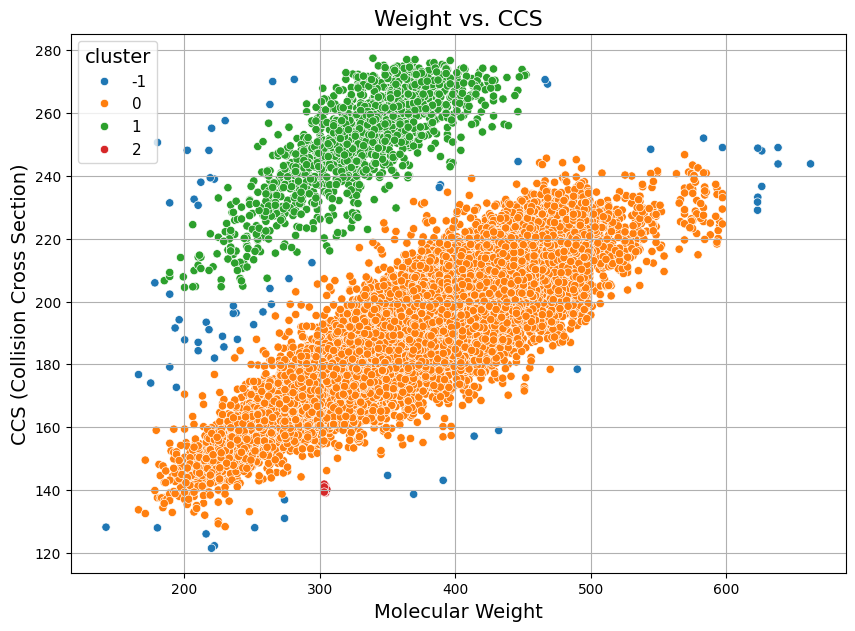

In [37]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=ccs_df, x='weights', y='CCS_AVG', hue='cluster', palette='tab10'
)
plt.xlabel("Molecular Weight")
plt.ylabel("CCS (Collision Cross Section)")
plt.title("Weight vs. CCS")
plt.grid(True)
plt.show()

In [38]:
# Analyze clusters

upper_cluster = ccs_df[ccs_df['cluster'] == 1] # has higher CCS values on average
bottom_cluster = ccs_df[ccs_df['cluster'] == 0]

/tmp/ipykernel_1682682/1741744029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ccs_df, x='cluster', y='ring_count', palette='Set2')


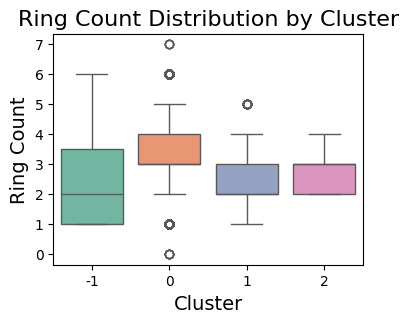

Ring count t-test: t = -32.745, p = 8.467204378555626e-177
Rare element chi-square test: chi2 = 13.761, p = 0.0032495757117942474


In [39]:
# ring_count, rare_element included

plt.figure(figsize=(4, 3))
sns.boxplot(data=ccs_df, x='cluster', y='ring_count', palette='Set2')
plt.title('Ring Count Distribution by Cluster')
plt.ylabel('Ring Count')
plt.xlabel('Cluster')
plt.show()

# Cluster 0 (bottom cluster) seems to have more rings compared to cluster 1 (upper cluster). This makes sense since molecules 
# with more rings tend to be more compact

# print(upper_cluster['rare_element_included'].mean()) 
# print(bottom_cluster['rare_element_included'].mean())

# 27.6% of the molecules in upper cluster include rare elements compared to 32% in bottom cluster.

ring_upper = upper_cluster['ring_count'].dropna()
ring_bottom = bottom_cluster['ring_count'].dropna()

# Perform t-test for ring count
t_stat, p_value = ttest_ind(ring_upper, ring_bottom, equal_var=False)

print(f"Ring count t-test: t = {t_stat:.3f}, p = {p_value}")    # ~0

# Perform chi-square test for rare element existence
# Build contingency table
table = pd.crosstab(ccs_df['cluster'], ccs_df['rare_element_included'])

chi2, p, dof, expected = chi2_contingency(table)

print(f"Rare element chi-square test: chi2 = {chi2:.3f}, p = {p}")  # 0.003


In [40]:
ring_upper

10       3
17       4
66       3
68       2
89       2
        ..
44114    3
44167    4
44297    4
44342    4
44395    2
Name: ring_count, Length: 1344, dtype: int64

<h5>Prediction</h5>

In [41]:
fiora = SimulationFramework(None, dev=dev, with_RT=True, with_CCS=True)
fiora.pred_all(ccs_df, base_model)


In [42]:
ccs_df['CCS_pred'] = ccs_df["Metabolite"].apply(lambda x: x.CCS_pred)

In [43]:
ccs_df['CCS_pred']

0        tensor(191.9466, device='cuda:0')
1        tensor(191.9459, device='cuda:0')
2        tensor(208.1397, device='cuda:0')
3        tensor(213.6994, device='cuda:0')
4        tensor(171.2999, device='cuda:0')
                       ...                
44402    tensor(176.8240, device='cuda:0')
44403    tensor(176.7797, device='cuda:0')
44404    tensor(202.7449, device='cuda:0')
44405    tensor(192.2687, device='cuda:0')
44406    tensor(188.1292, device='cuda:0')
Name: CCS_pred, Length: 44407, dtype: object

Measure MSE of predicted and experimental values

In [44]:
mse = 0

mse = ((ccs_df['CCS_AVG'] - ccs_df['CCS_pred'].apply(lambda x: x.item()))**2).mean()
print(mse)


253.72799306954525


Plot Experimental CCS vs. Predicted CCS

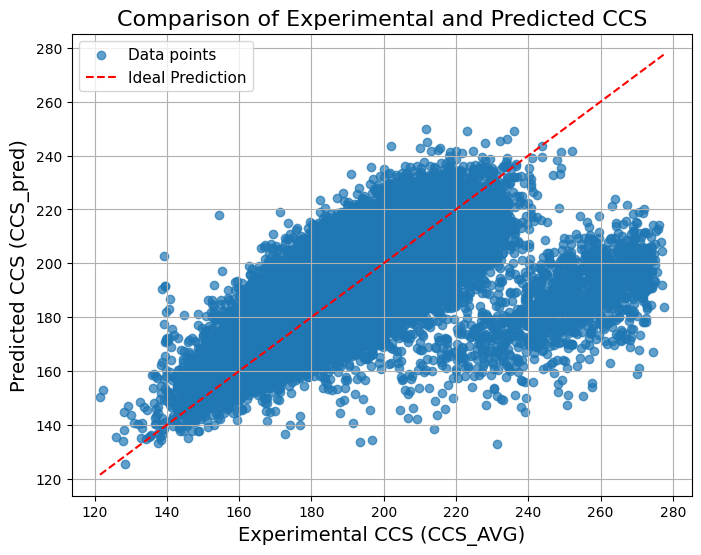

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(ccs_df['CCS_AVG'], ccs_df['CCS_pred'].apply(lambda x: x.item()), alpha=0.7, label="Data points") #alpha:transparency
plt.plot([ccs_df['CCS_AVG'].min(), ccs_df['CCS_AVG'].max()],
         [ccs_df['CCS_AVG'].min(), ccs_df['CCS_AVG'].max()],
         color='red', linestyle='--', label="Ideal Prediction")

plt.xlabel("Experimental CCS (CCS_AVG)")
plt.ylabel("Predicted CCS (CCS_pred)")
plt.title("Comparison of Experimental and Predicted CCS")
plt.legend()
plt.grid()
plt.show()

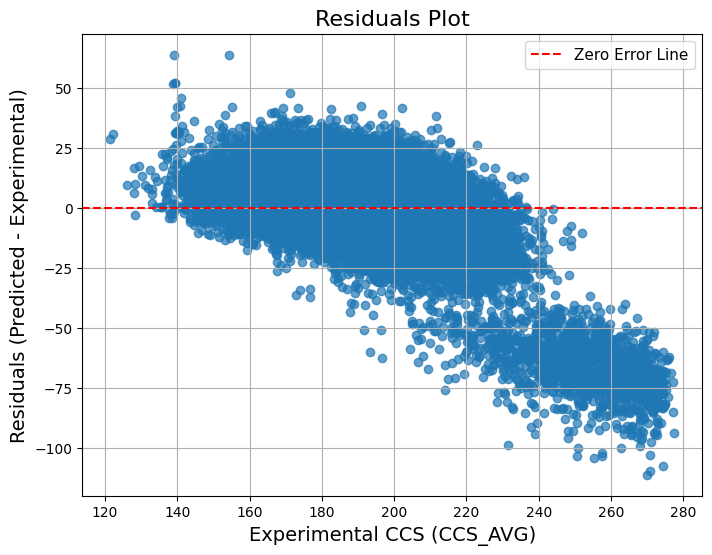

In [46]:
plt.figure(figsize=(8, 6))
residuals = ccs_df['CCS_pred'].apply(lambda x: x.item()) - ccs_df['CCS_AVG']
plt.scatter(ccs_df['CCS_AVG'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label="Zero Error Line")

plt.xlabel("Experimental CCS (CCS_AVG)")
plt.ylabel("Residuals (Predicted - Experimental)")
plt.title("Residuals Plot")
plt.legend()
plt.grid()
plt.show()

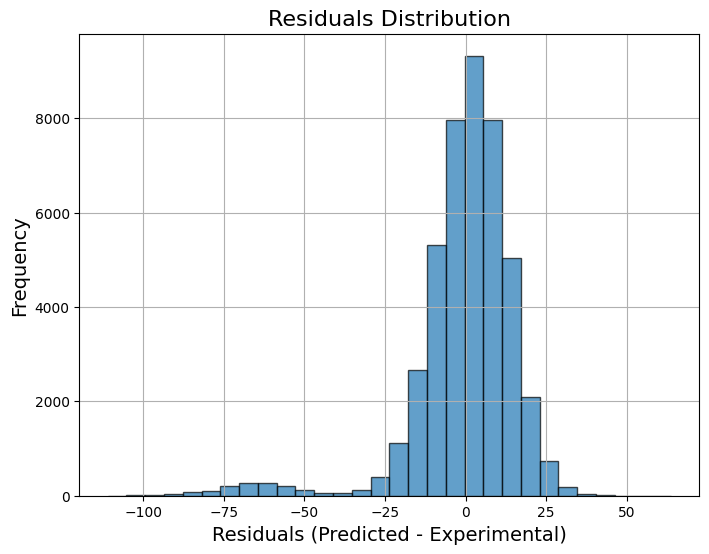

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')

plt.xlabel("Residuals (Predicted - Experimental)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid()
plt.show()

In [48]:
from sklearn.metrics import r2_score

# Berechnung des R²-Werts
r2 = r2_score(ccs_df['CCS_AVG'], ccs_df['CCS_pred'].apply(lambda x: x.item()))
print(f"R²-Wert: {r2}")

R²-Wert: 0.3529058792913994


In [49]:
ccs_df['error'] = (ccs_df['CCS_AVG'] - ccs_df['CCS_pred'].apply(lambda x: x.item())).abs()

# 100 biggest deviation
largest_errors_df = ccs_df.nlargest(100, 'error')
print("Größte Abweichungen:")
print(largest_errors_df[['CCS_AVG', 'CCS_pred', 'error']])

Größte Abweichungen:
       CCS_AVG                           CCS_pred       error
36656   270.05  tensor(158.9468, device='cuda:0')  111.103192
36608   270.69  tensor(161.2299, device='cuda:0')  109.460081
38889   274.48  tensor(167.1784, device='cuda:0')  107.301564
32956   255.17  tensor(150.8709, device='cuda:0')  104.299089
32336   257.59  tensor(154.0916, device='cuda:0')  103.498371
...        ...                                ...         ...
13340   246.72  tensor(163.4458, device='cuda:0')   83.274214
37774   257.49  tensor(174.2220, device='cuda:0')   83.268015
39892   274.06  tensor(190.8424, device='cuda:0')   83.217639
36922   272.35  tensor(189.1557, device='cuda:0')   83.194315
1558    264.20  tensor(181.1316, device='cuda:0')   83.068439

[100 rows x 3 columns]


In [50]:
# not a very interpretable plot

import seaborn as sns

# ccs_pred_values = largest_errors_df['CCS_pred'].apply(lambda x: x.item())

# plt.figure(figsize=(10, 6))

# # Scatter plot of the CCS_AVG vs. CCS_pred
# sns.scatterplot(data=largest_errors_df, x='CCS_AVG', y=ccs_pred_values)
# plt.plot([largest_errors_df['CCS_AVG'].min(), largest_errors_df['CCS_AVG'].max()],
#          [largest_errors_df['CCS_AVG'].min(), largest_errors_df['CCS_AVG'].max()],
#          color='red', linestyle='--', label="Ideal Prediction (y = x)")
# # Titles and labels
# plt.title("100 Biggest Errors Between CCS_AVG and CCS_pred")
# plt.xlabel("CCS_AVG")
# plt.ylabel("CCS_pred")
# plt.legend()
# plt.grid()

plt.show()

In [51]:
# R² for M+H and M-H seperately
if not debug_mode:
    for mode in ['[M+H]+', '[M-H]-']:
        mode_df = ccs_df[ccs_df['Precursor Adduct'] == mode]
        r2_mode = r2_score(mode_df['CCS_AVG'], mode_df['CCS_pred'].apply(lambda x: x.item()))
        print(f"R² for {mode}: {r2_mode}")

R² for [M+H]+: 0.2967642768217851
R² for [M-H]-: 0.4410620401378018


Split Train/Test/Validation Data

In [52]:
from sklearn.model_selection import train_test_split

seed = 42

def train_val_test_split(keys, test_size=0.1, val_size=0.1, rseed=seed):
    temp_keys, test_keys = train_test_split(keys, test_size=test_size, random_state=rseed)
    adjusted_val_size = val_size / (1 - test_size)
    train_keys, val_keys = train_test_split(temp_keys, test_size=adjusted_val_size, random_state=rseed)
    
    return train_keys, val_keys, test_keys

group_ids = ccs_df["group_id"].astype(int)
keys = np.unique(group_ids)
example_not_in_test_split = True

train, val, test = train_val_test_split(keys, rseed=seed)
ccs_df["datasplit"] = ccs_df["group_id"].apply(lambda x: 'train' if x in train else 'validation' if x in val else 'test' if x in test else 'VALUE ERROR')


In [53]:
test_df = ccs_df[ccs_df['datasplit'] == 'test']

In [54]:
train_df = ccs_df[ccs_df['datasplit'] == 'train']

In [55]:
if not debug_mode:
    for mode in ['[M+H]+', '[M-H]-']:
        mode_df = test_df[test_df['Precursor Adduct'] == mode]
        r2_mode = r2_score(mode_df['CCS_AVG'], mode_df['CCS_pred'].apply(lambda x: x.item()))
        print(f"R² for {mode} (Test Set): {r2_mode}")

R² for [M+H]+ (Test Set): 0.314364108288103
R² for [M-H]- (Test Set): 0.4507635426854415


/tmp/ipykernel_1682682/2330683015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['carbon_ratios'] = test_df["Metabolite"].apply(lambda x: x.element_distribution['C'])
/tmp/ipykernel_1682682/2330683015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["carbon_bin"] = pd.cut(test_df["carbon_ratios"], bins=10)


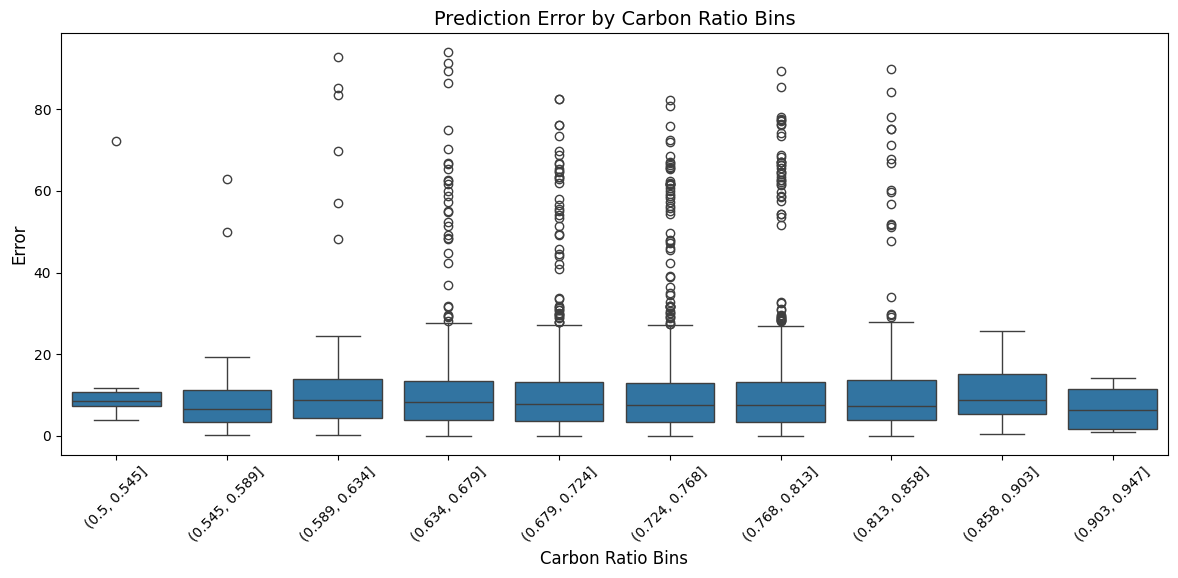

In [56]:
# Plot Error Compared to Carbon-Ratio

test_df['carbon_ratios'] = test_df["Metabolite"].apply(lambda x: x.element_distribution['C'])

test_df["carbon_bin"] = pd.cut(test_df["carbon_ratios"], bins=10)

plt.figure(figsize=(12, 6))
sns.boxplot(data=test_df, x="carbon_bin", y="error")
plt.title("Prediction Error by Carbon Ratio Bins", fontsize=14)
plt.xlabel("Carbon Ratio Bins", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [57]:
import fiora.MOL.constants

def is_element_included(element, metabolite):    # element as symbol
    if element in metabolite.node_elements:
        return True
    else:
        return False

def rare_element_included(metabolite):
    rare_elements = fiora.MOL.constants.RARE_ELEMENTS
    included = False
    for element in rare_elements:
        included = included or is_element_included(element, metabolite)
    return included


In [58]:
# # check if there is any difference in rare_element_included ratios between filtered_df vs. ccs_df
# filtered_df['rare_element_included'] = filtered_df["Metabolite"].apply(lambda x : rare_element_included(x))

# # Calculate the ratio of True values in each DataFrame
# ccs_rare_ratio = ccs_df['rare_element_included'].mean()
# filtered_rare_ratio = filtered_df['rare_element_included'].mean()

# print(f"Ratio of rare element included in full dataset: {ccs_rare_ratio:.4f}")
# print(f"Ratio of rare element included in filtered dataset: {filtered_rare_ratio:.4f}")

# ccs_df['carbon_ratios'] = ccs_df["Metabolite"].apply(lambda x: x.element_distribution['C'])
# filtered_df['carbon_ratios'] = filtered_df["Metabolite"].apply(lambda x: x.element_distribution['C'])

# ccs_carbon_ratio = ccs_df['carbon_ratios'].mean()
# filtered_carbon_ratio = filtered_df['carbon_ratios'].mean()

# print(f"Ratio of carbon in full dataset: {ccs_carbon_ratio:.4f}")
# print(f"Ratio of carbon in filtered dataset: {filtered_carbon_ratio:.4f}")


/tmp/ipykernel_1682682/2538906055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['I_included'] = test_df["Metabolite"].apply(lambda x : is_element_included('I', x))


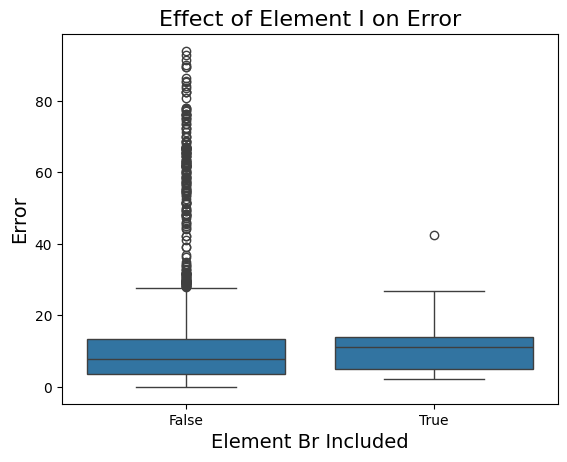

In [59]:
# Plot Error Depending on Iod Existence

test_df['I_included'] = test_df["Metabolite"].apply(lambda x : is_element_included('I', x))

sns.boxplot(data=test_df, x='I_included', y='error')
plt.xlabel("Element Br Included")
plt.ylabel("Error")
plt.title("Effect of Element I on Error")
plt.show()

Classify Metabolites Based on Murcko Scaffold and Evaluate the Error Rates Depending on These Classes

/tmp/ipykernel_1682682/2821679205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rare_element_included'] = test_df["Metabolite"].apply(lambda x : rare_element_included(x))


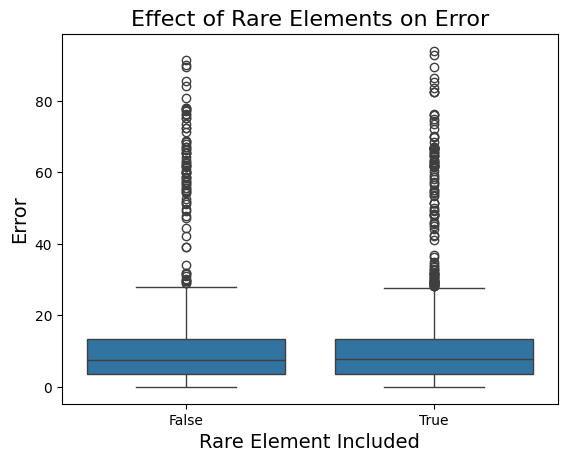

In [60]:
# Plot Error Depending on Rare Element Existence

test_df['rare_element_included'] = test_df["Metabolite"].apply(lambda x : rare_element_included(x))

sns.boxplot(data=test_df, x='rare_element_included', y='error')
plt.xlabel("Rare Element Included")
plt.ylabel("Error")
plt.title("Effect of Rare Elements on Error")
plt.show()

In [61]:
datasplit_value_counts = ccs_df['datasplit'].value_counts()
print(datasplit_value_counts)

datasplit
train         35572
validation     4446
test           4389
Name: count, dtype: int64


In [62]:
ccs_df['carbon_ratio'] = ccs_df['Metabolite'].apply(lambda x: x.element_distribution['C'] / len(x.node_elements))

<h4>Class PropertyTrainer</h4>

In [63]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch_geometric.loader as geom_loader
from torchmetrics import Accuracy, MetricTracker, MetricCollection, Precision, Recall, PrecisionRecallCurve, MeanSquaredError, MeanAbsoluteError, R2Score, PearsonCorrCoef
from sklearn.model_selection import train_test_split
from typing import Literal, List, Callable, Any, Dict

from fiora.GNN.Trainer import Trainer
from fiora.GNN.Datasets import collate_graph_batch, collate_graph_edge_batch
from fiora.GNN.Losses import WeightedMSELoss, WeightedMAELoss

In [64]:
# debug freezing for LoRA

def debug_freezing(model, optimizer=None, tag=""):
    params = list(model.model.named_parameters()) if hasattr(model, "model") else list(model.named_parameters())
    trainable_params = [n for n,p in params if p.requires_grad]
    frozen_params = [n for n,p in params if not p.requires_grad]
    print((f"[DEBUG {tag}] trainable={len(trainable_params)}, frozen={len(frozen_params)}"))
    if trainable_params: #not 0
        suspicious_params = [n for n in trainable_params if "delta" not in n.lower()]
        if suspicious_params:
            print("Non-LoRA trainables : ", suspicious_params)

    if optimizer is not None:
        opt_names = set()   # set of param names that actually go in the optimizer
        for g in optimizer.param_groups:
            for p in g["params"]:
                for n, q in params:
                    if q is p: 
                        opt_names.add(n)
                        break

        leaks = [n for n,p in params if (p.requires_grad and n not in opt_names) or (not p.requires_grad and n in opt_names)]
        if leaks:
            print("  -> Optimizer mismatch (leaks):")

        

In [65]:
class PropertyTrainer(Trainer):
    def __init__(self, data: Any, train_val_split: float= 0.8, split_by_group: bool=False, only_training: bool=False, train_keys: List[int]=[], val_keys: List[int]=[], test_keys: List[int]=[], y_tag: str="y", metric_dict: Dict=None, problem_type: Literal["classification", "regression", "softmax_regression"]="classification", library: Literal["standard", "geometric"]="geometric", num_workers: int=0, seed: int=42, device: str="cpu"):
        
        super().__init__(data, train_val_split, split_by_group, only_training, train_keys, val_keys, test_keys, seed, num_workers, device)
        self.y_tag = y_tag
        self.problem_type = problem_type

        self.data = data 
         
        # Initialize torch metrics based on dictionary 
        if metric_dict:
            self.metrics = {
                data_split: MetricTracker(MetricCollection({
                        t: M() for t,M in metric_dict.items()       # t: metric name, M() corresponding metric class instance (e.g. torchmetrics.R2Score())
                    })).to(device)
                for data_split in ["train", "val", "test"]
            }
        else:
            self.metrics = self._get_default_metrics(problem_type)
        self.loader_base = geom_loader.DataLoader if library == "geometric" else DataLoader
    
    def _training_loop(self, model, dataloader, optimizer, loss_fn, metrics, property: str="ccs", with_weights=False, with_RT=False, with_CCS=True, rt_metric=False, title=""):
        metrics.increment()   

        for batch in dataloader: # enumerate  
            # print(batch)
            # Feed forward
            batch = batch.to(dev) # "cuda:1"

            model.train() # training mode

            # print("Is model in training mode?", model.training)
            
            y_pred = model(batch)
            # print("requires_grad:", y_pred[property].requires_grad)
            # print("grad_fn:", y_pred[property].grad_fn)  


            target = batch[property]#.to(torch.float32)
            #target = target.view(-1, 1)
            #target = target.to("cuda:1")

            # print("Predicted shape:", y_pred[property].shape)
            # print("Target shape:", target.shape)

            loss = loss_fn(y_pred[property], target)  

            # Backpropagate
            optimizer.zero_grad()
            loss.backward()

            # Debugging purpose, REMOVE AFTERWARDS
            if not hasattr(self, "_freeze_checked") and isinstance(model, FinetuneFioraWrapper):
                # base params must have no grads
                bad = [n for n,p in model.model.named_parameters() if p.grad is not None and p.grad.abs().sum().item() > 0]
                print(f"[DEBUG] grads_on_frozen={len(bad)}")
                if bad:
                    raise RuntimeError("Frozen params are receiving gradients")

                delta_has_grad = any(d.grad is not None and d.grad.abs().sum().item() > 0 for d in model.parameters())
                print(f"[DEBUG] any_delta_grad={delta_has_grad}")
                if not delta_has_grad:
                    raise RuntimeError("No gradients on LoRA deltas — check forward (use W.detach()+Δ or functional_call).")

                self._freeze_checked = True

            optimizer.step()        

    def _validation_loop(self, model, dataloader, loss_fn, metrics, with_weights=False, with_RT=False,  with_CCS=True, property: str="ccs", rt_metric=False, title="Validation"):
        metrics.increment()
        with torch.no_grad():
            for batch in dataloader:
                model.eval()
                y_pred = model(batch) # with_CCS = True
                loss = loss_fn(y_pred[property], batch[property])
                    
                metrics(y_pred[property], batch[property]) # call update                      

        # End of Validation cycle
        stats = metrics.compute()
        print(f'\t{title} RMSE: {torch.sqrt(stats["mse"]):>.4f}')
        return stats
    
    def _test_loop(self, model, dataloader, loss_fn, metrics, property: str="ccs", rt_metric=False):
        metrics.increment()
        all_preds = []
        all_targets = []
        all_smiles = []
        all_precursors = []
        all_ring_counts = []
        all_presence_rare_elements = []

        with torch.no_grad():
            for batch in dataloader:
                model.eval()
                y_pred = model(batch)  # Forward pass
                loss = loss_fn(y_pred[property], batch[property])

                metrics(y_pred[property], batch[property])  # Call update on metrics

                all_preds.append(y_pred[property].cpu())
                all_targets.append(batch[property].cpu())

                if "smiles" in batch:
                    all_smiles.extend(batch["smiles"])

                if "precursor_positive" in batch:
                    all_precursors.extend(batch["precursor_positive"])
                
                if "ring_count" in batch:
                    all_ring_counts.extend(batch["ring_count"])

                if "presence_rare_elements" in batch:
                    all_presence_rare_elements.extend(batch["presence_rare_elements"])
                

        # End of Test cycle
        stats = metrics.compute()
        # print(f'\tTest RMSE: {torch.sqrt(stats["mse"]):>.4f}')

        stats["predictions"] = torch.cat(all_preds).numpy()
        stats["targets"] = torch.cat(all_targets).numpy()
        stats["smiles"] = all_smiles
        stats["precursor_positive"] = all_precursors
        stats["ring_counts"] = all_ring_counts
        stats["presence_rare_elements"] = all_presence_rare_elements

        for stat in stats:
            stat_name = stat.upper()
            if stat_name == "MSE":
                print(f'\tTest RMSE: {torch.sqrt(stats["mse"]):>.4f}')
            elif stat_name in ["MSE", "MAE", "R2", "PEARSON"]:
                print(f"\tTest {stat_name}: {stats[stat]:.4f}")
            else:
                continue
        
        return stats
        
    # Training function
    def train(self, model, optimizer, loss_fn, scheduler=None, batch_size=16, epochs=2, val_every_n_epochs=1, with_RT=True, with_CCS=True, rt_metric=False, tag="") -> Dict[str, Any]:
        
        # Set up checkpoint system and model info
        self._init_checkpoint_system(save_path=f"saved_models/checkpoint_{tag}.best.pt")
        model.model_params["training_label"] = self.y_tag
        
        # Stage data into dataloader
        training_loader = self.loader_base(self.data, batch_size=batch_size, num_workers=self.num_workers, shuffle=True)
        if not self.only_training:
            validation_loader = self.loader_base(self.validation_data, batch_size=batch_size, num_workers=self.num_workers, shuffle=True)
        using_weighted_loss_func = isinstance(loss_fn, WeightedMSELoss) | isinstance(loss_fn, WeightedMAELoss)
        
        # Main loop
        for e in range(epochs):
            # Training
            self._training_loop(model, training_loader, optimizer, loss_fn, self.metrics["train"], title=f'Epoch {e + 1}/{epochs}: ', with_weights=using_weighted_loss_func, with_RT=with_RT, with_CCS=with_CCS, rt_metric=rt_metric)
            # Validation
            is_val_cycle = not self.only_training and ((e + 1) % val_every_n_epochs == 0)
            if is_val_cycle:   
                val_stats = self._validation_loop(model, validation_loader, loss_fn, self.metrics["val"], with_weights=using_weighted_loss_func, with_RT=with_RT, with_CCS=with_CCS, rt_metric=rt_metric,  title="Validation")
                
                # Update checkpoint
                if val_stats["mse"].tolist() < self.checkpoint_stats["val_loss"]:
                    self._update_checkpoint({"epoch": e+1, "val_loss": val_stats["mse"].tolist()}, model)
                    print(f"\t >> Set new checkpoint to epoch {e+1}")
            
            # End of epoch: Advance scheduler
            if scheduler:
                if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    if is_val_cycle:
                        scheduler.step(torch.sqrt(val_stats["mse"]))
                else:
                    scheduler.step()
                    
        print("Finished Training!")
        return self.checkpoint_stats

    def test(self, model, loss_fn, batch_size=16, tag="") -> Dict[str, Any]:
        """
        Test the trained model on the test dataset and compute the RMSE.
        """
        if model is None:
            raise ValueError("Model is None. Ensure the model is correctly initialized and passed.")

        # Stage test data into dataloader
        test_loader = self.loader_base(self.test_data, batch_size=batch_size, num_workers=self.num_workers, shuffle=False)

        # Test loop
        print(f"Testing model: {tag}")
        test_stats = self._test_loop(model, test_loader, loss_fn, self.metrics["test"])

        return test_stats
    

In [66]:
geo_data = ccs_df['geo_data'].values

In [67]:
# geo_data = torch.tensor(geo_data, dtype=torch.float32).to("cuda:1")

In [68]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(base_model.parameters(), lr=0.0001)
train_keys, val_keys, test_keys = ccs_df[ccs_df["datasplit"] == "train"]["group_id"].unique(), ccs_df[ccs_df["datasplit"] == "validation"]["group_id"].unique(), ccs_df[ccs_df["datasplit"] == "test"]["group_id"].unique()

torch.autograd.set_detect_anomaly(True)

trainer_fiora = PropertyTrainer(
    data=geo_data,
    y_tag='ccs',
    problem_type="regression",
    train_keys=train_keys,
    val_keys=val_keys,
    test_keys=test_keys,
    metric_dict=None,
    split_by_group=True,
    device=dev # "cuda:1"
)

# Train the model
checkpoint = trainer_fiora.train(
    model=base_model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=60,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="fiora"
)

model = FinetuneFioraWrapper(base_model)

# pre-optimzer check: is the model in the expected freeze state?
debug_freezing(model, tag="pre-opt")

optimizer_lora = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-6)

# post-optimizer check: dose the optimizer only touch deltas and no base weights?
debug_freezing(model, optimizer=optimizer_lora, tag="post-opt")

checkpoint_lora = trainer_fiora.train(
    model=model,
    optimizer=optimizer_lora,
    loss_fn=loss_fn,
    epochs=60,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="lora_fiora"
)

Using pre-set train/validation/test keys


/home/lbarbut/anaconda3/envs/fiora/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: FutureWarning: The default value for `maximize` will be changed from `True` to `None` in v1.7.0 of TorchMetrics,will automatically infer the value based on the `higher_is_better` attribute of the metric (if such attribute exists) or raise an error if it does not. If you are explicitly setting the `maximize` argument to either `True` or `False` already, you can ignore this warning.
  warnings.warn(*args, **kwargs)  # noqa: B028


	Validation RMSE: 15.0869
	 >> Set new checkpoint to epoch 1
	Validation RMSE: 14.4793
	 >> Set new checkpoint to epoch 2
	Validation RMSE: 14.3275
	 >> Set new checkpoint to epoch 3
	Validation RMSE: 14.2368
	 >> Set new checkpoint to epoch 4
	Validation RMSE: 14.0803
	 >> Set new checkpoint to epoch 5
	Validation RMSE: 13.9712
	 >> Set new checkpoint to epoch 6
	Validation RMSE: 13.8536
	 >> Set new checkpoint to epoch 7
	Validation RMSE: 13.7686
	 >> Set new checkpoint to epoch 8
	Validation RMSE: 13.6701
	 >> Set new checkpoint to epoch 9
	Validation RMSE: 13.6138
	 >> Set new checkpoint to epoch 10
	Validation RMSE: 13.4433
	 >> Set new checkpoint to epoch 11
	Validation RMSE: 13.3516
	 >> Set new checkpoint to epoch 12
	Validation RMSE: 13.2831
	 >> Set new checkpoint to epoch 13
	Validation RMSE: 13.2061
	 >> Set new checkpoint to epoch 14
	Validation RMSE: 13.2056
	 >> Set new checkpoint to epoch 15
	Validation RMSE: 13.1501
	 >> Set new checkpoint to epoch 16
	Validation RMSE:

KeyboardInterrupt: 

In [69]:
for name, p in model.model.named_parameters():
    print(f"{name:60} | requires_grad={p.requires_grad}")


node_embedding.embeddings.0.weight                           | requires_grad=False
node_embedding.embeddings.1.weight                           | requires_grad=False
node_embedding.embeddings.2.weight                           | requires_grad=False
edge_embedding.embeddings.0.weight                           | requires_grad=False
edge_embedding.embeddings.1.weight                           | requires_grad=False
GNN_module.graph_layers.0.weight                             | requires_grad=False
GNN_module.graph_layers.0.root                               | requires_grad=False
GNN_module.graph_layers.0.bias                               | requires_grad=False
GNN_module.graph_layers.1.weight                             | requires_grad=False
GNN_module.graph_layers.1.root                               | requires_grad=False
GNN_module.graph_layers.1.bias                               | requires_grad=False
GNN_module.graph_layers.2.weight                             | requires_grad=False
GNN_

In [70]:
#x = FinetuneFioraWrapper(base_model)
for name, param in model.model.GNN_module.graph_layers[0].named_parameters():
    print(f"{name:20} | requires_grad: {param.requires_grad}")



weight               | requires_grad: False
root                 | requires_grad: False
bias                 | requires_grad: False


In [71]:
# DO THIS TO LOAD MODEL AND TEST THAT MODEL
# ALSO FOR DIFFERENT MODELS

# model = model.load(checkpoint["file"])

In [72]:
print(geo_data[0].x)  # Assuming geo_data contains PyTorch Geometric Data objects


tensor([[6, 0, 0],
        [1, 0, 0],
        [5, 1, 0],
        [1, 2, 0],
        [1, 0, 3],
        [1, 1, 3],
        [1, 1, 3],
        [1, 0, 3],
        [1, 1, 3],
        [1, 1, 3],
        [3, 0, 0],
        [5, 1, 0],
        [1, 2, 0],
        [1, 2, 0],
        [1, 2, 0],
        [5, 0, 2],
        [1, 2, 2],
        [1, 2, 2],
        [1, 0, 3],
        [1, 0, 3],
        [1, 1, 3],
        [1, 1, 3],
        [1, 1, 3],
        [1, 1, 3]], device='cuda:0', dtype=torch.int32)


<h4>Linear Model</h4>

In [73]:
import torch.nn as nn

In [74]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier Initialization
        nn.init.zeros_(m.bias)  # Initialize bias to zero

In [75]:
# Simple linear model
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.activation = nn.ReLU()

        # Include model parameters as required by PropertyTrainer
        self.model_params = {
            "training_label": None, # changed to 'ccs' through y_tag in PropertyTrainer
            "input_dim": input_dim,
            "output_dim": output_dim,
        }

    def forward(self, batch):
        # Handle dictionary-style batches
        # print(batch)
        if isinstance(batch, dict):
            x = batch.get("data")
            # print(f"X: {x}")

        # Handle PyTorch Geometric-style batches
        elif hasattr(batch, "weight") and hasattr(batch, "precursor_positive"):
            # , "ring_count", "presence_rare_elements", "elem_distr_vec"
            attributes = ["weight", "precursor_positive"]

            # Extract attributes if they exist, otherwise use a zero tensor
            features = []
            
            for attr in attributes:
                if hasattr(batch, attr):

                    value = getattr(batch, attr)

                    # if isinstance(value, (list, np.ndarray)):
                    #     tensor = torch.tensor(value, dtype=torch.float32).unsqueeze(-1).to(dev)
                    # else:
                    #     tensor = value.unsqueeze(-1).float().to(dev)
                    if isinstance(value, (list, np.ndarray)):
                        value = np.array(value)

                    if isinstance(value, torch.Tensor):
                        tensor = value.float().to(dev)
                    else:
                        tensor = torch.tensor(value, dtype=torch.float32).to(dev)

                    # Ensure tensor is 2D: [batch_size, feature_dim]
                    if tensor.ndim == 1:
                        tensor = tensor.unsqueeze(-1)
                    elif tensor.ndim > 2:
                        tensor = tensor.view(tensor.size(0), -1)

                else:
                    tensor = torch.zeros_like(batch.weight).unsqueeze(-1).float().to(dev)
                    
                features.append(tensor)

            # Concatenate all features
            x = torch.cat(features, dim=-1)

            # Ensure the input is a float tensor
            x = x.to(dev)#to(torch.float32).to("cuda:1")

            # Forward pass
            output = self.linear(x)
            return {"ccs": output}

        else:
            raise KeyError("Batch does not contain the required 'data' or 'weight' & 'precursor_positive' attributes.")

    def save(self, filepath):
        """Save the model to the given filepath."""
        # GNNCompiler.save(filepath)
        # print(f"State Dict: {self.state_dict()}")
        torch.save(self.state_dict(), filepath)
        print(f"Model saved to {filepath}")

    def load(self, filepath):
        """Load the model's state from a given filepath."""
        # Load the state dictionary from the saved checkpoint
        # GNNCompiler.load(PATH=filepath)
        self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu
        print(f"Model loaded from {filepath}")
        
# Instantiate the model
input_dim = 2
output_dim = 1
linear_model = LinearModel(input_dim, output_dim).to(dev)

#linear_model.apply(initialize_weights)

optimizer_linear = torch.optim.Adam(linear_model.parameters(), lr=0.001)

# for param in linear_model.parameters():
#     print(param)

trainer_linear = PropertyTrainer(
    data=geo_data,
    y_tag="ccs",
    problem_type="regression",
    train_keys=train_keys,
    val_keys=val_keys,
    test_keys=test_keys,
    metric_dict=None,
    split_by_group=True,
    device=dev, # "cuda:1"
    library="geometric"
)

# Train the model
# linear_model = linear_model.to("cuda:1")
linear_checkpoint = trainer_linear.train(
    model=linear_model,
    optimizer=optimizer_linear,
    loss_fn=loss_fn,
    epochs=60,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="linear"
)

Using pre-set train/validation/test keys
	Validation RMSE: 24.8540
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 1
	Validation RMSE: 24.7667
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 2
	Validation RMSE: 24.5289
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 3
	Validation RMSE: 24.3779
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 4
	Validation RMSE: 24.0905
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 5
	Validation RMSE: 23.9129
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 6
	Validation RMSE: 23.7170
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 7
	Validation RMSE: 23.5357
Model saved to saved_models/checkpoint_linear.best.pt
	 >> Set new checkpoint to epoch 8
	Validation RMSE: 23.3947
Model saved t

In [76]:
import torch_geometric as geom
optimizer_linear = torch.optim.Adam(linear_model.parameters(), lr=0.001)
y_pred = linear_model(geom.data.Batch.from_data_list(geo_data[0:5]))
loss = loss_fn(y_pred["ccs"], geom.data.Batch.from_data_list(geo_data[0:5])["ccs"])  

In [77]:
optimizer_linear.zero_grad()
loss.backward()
optimizer_linear.step()

In [78]:
y_pred["ccs"]

tensor([[176.7583],
        [193.6345],
        [211.5869],
        [221.5266],
        [166.4722]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [79]:
geom.data.Batch.from_data_list(geo_data[0:5])["ccs"]

tensor([[176.6300],
        [192.2600],
        [211.1200],
        [204.2200],
        [174.4700]], device='cuda:0')

In [80]:
# import os

# filepath = linear_checkpoint["file"]
# print(f"Checkpoint path: {filepath}")
# print(f"File exists: {os.path.exists(filepath)}")
# print(f"File size: {os.path.getsize(filepath) if os.path.exists(filepath) else 'N/A'} bytes")


In [81]:
# linear_model.save('../../checkpoint_test.pt')
# lin_model_test = linear_model.load('../../checkpoint_test.pt')

# print(lin_model_test)

In [82]:
# Load Linear Model from checkpoint

linear_model.load(linear_checkpoint["file"])

# In Debug Mode
# RuntimeError: Invalid magic number; corrupt file?
# .pt file size: 19809568 bytes

# Not In Debug Mode
# No error, linear_model = None
# .pt file size: 1600 bytes

Model loaded from saved_models/checkpoint_linear.best.pt


/tmp/ipykernel_221813/850025175.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu


In [83]:
print(linear_model)


LinearModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (activation): ReLU()
)


<h4>MLP Model</h4>

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class MLPModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLPModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),  # First hidden layer with 32 neurons
            nn.ReLU(),
            nn.Linear(32, 16),         # Second hidden layer with 16 neurons
            nn.ReLU(),
            nn.Linear(16, output_dim)  # Output layer
        )

        # Include model parameters as required by PropertyTrainer
        self.model_params = {
            "training_label": None, # changed to 'ccs' through y_tag in PropertyTrainer
            "input_dim": input_dim,
            "output_dim": output_dim,
        }

    def forward(self, batch):
        if isinstance(batch, dict):
            x = batch.get("data")
        elif hasattr(batch, "weight") and hasattr(batch, "precursor_positive"):
            # , "ring_count", "presence_rare_elements", "elem_distr_vec"
            attributes = ["weight", "precursor_positive"]

            # Extract attributes if they exist, otherwise use a zero tensor
            features = []
            
            for attr in attributes:
                if hasattr(batch, attr):
                    value = getattr(batch, attr)
                    if isinstance(value, (list, np.ndarray)):
                        value = np.array(value)

                    if isinstance(value, torch.Tensor):
                        tensor = value.float().to(dev)
                    else:
                        tensor = torch.tensor(value, dtype=torch.float32).to(dev)

                    # Ensure tensor is 2D: [batch_size, feature_dim]
                    if tensor.ndim == 1:
                        tensor = tensor.unsqueeze(-1)
                    elif tensor.ndim > 2:
                        tensor = tensor.view(tensor.size(0), -1)
                else:
                    tensor = torch.zeros_like(batch.weight).unsqueeze(-1).float().to(dev)
                features.append(tensor)

            # Concatenate all features
            x = torch.cat(features, dim=-1)

            # Ensure the input is a float tensor
            x = x.to(dev)
        else:
            raise KeyError("Batch does not contain 'data' or 'weight' & 'precursor_positive' attributes.")

        return {"ccs": self.layers(x)}

    def save(self, filepath):
        torch.save(self.state_dict(), filepath)
        print(f"Model saved to {filepath}")

    def load(self, filepath):
        self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu
        print(f"Model loaded from {filepath}")

# Instantiate Model
input_dim = 2
output_dim = 1  
mlp_model = MLPModel(input_dim, output_dim).to(dev)

# print(f"MLP Model: {mlp_model}")

optimizer_mlp = torch.optim.Adam(mlp_model.parameters(), lr=0.001)

trainer_mlp = PropertyTrainer(
    data=geo_data,
    y_tag="ccs",
    problem_type="regression",
    train_keys=train_keys,
    val_keys=val_keys,
    test_keys=test_keys,
    metric_dict=None,
    split_by_group=True,
    device=dev,
    library="geometric"
)

# Train the model
mlp_checkpoint = trainer_mlp.train(
    model=mlp_model,
    optimizer=optimizer_mlp,
    loss_fn=loss_fn,
    epochs=60,
    val_every_n_epochs=1,
    with_CCS=True,
    tag="mlp"
)


Using pre-set train/validation/test keys
	Validation RMSE: 24.7917
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 1
	Validation RMSE: 24.3810
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 2
	Validation RMSE: 23.3950
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 3
	Validation RMSE: 22.2945
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 4
	Validation RMSE: 20.7235
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 5
	Validation RMSE: 17.7702
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 6
	Validation RMSE: 15.9848
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 7
	Validation RMSE: 15.5552
Model saved to saved_models/checkpoint_mlp.best.pt
	 >> Set new checkpoint to epoch 8
	Validation RMSE: 15.7988
	Validation RMSE: 15.5499
Model saved

In [85]:
# mlp_model = mlp_model.load(mlp_checkpoint["file"])
# print(f"MLP Model: {mlp_model}")

# filepath = mlp_checkpoint["file"]
# print(f"Checkpoint path: {filepath}")
# print(f"File exists: {os.path.exists(filepath)}")
# print(f"File size: {os.path.getsize(filepath) if os.path.exists(filepath) else 'N/A'} bytes")

In [86]:
print(mlp_checkpoint)

{'epoch': 55, 'val_loss': 236.0852508544922, 'file': 'saved_models/checkpoint_mlp.best.pt'}


In [87]:
# Load MLP Model from checkpoint

mlp_model.load(mlp_checkpoint["file"])

print(mlp_model)

Model loaded from saved_models/checkpoint_mlp.best.pt
MLPModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


/tmp/ipykernel_221813/905334369.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(filepath, map_location="cpu")) # cuda:1 / cpu


In [88]:
# Load Fiora Model from checkpoint

base_model.load(checkpoint["file"])  # model = fiora_model
print(base_model)
# filepath = checkpoint["file"]
# print(f"Checkpoint path: {filepath}")
# print(f"File exists: {os.path.exists(filepath)}")
# print(f"File size: {os.path.getsize(filepath) if os.path.exists(filepath) else 'N/A'} bytes")

GNNCompiler(
  (node_embedding): FeatureEmbedding(
    (embeddings): ModuleList(
      (0): Embedding(10, 100)
      (1-2): 2 x Embedding(5, 100)
    )
  )
  (edge_embedding): FeatureEmbedding(
    (embeddings): ModuleList(
      (0): Embedding(4, 150)
      (1): Embedding(5, 150)
    )
  )
  (GNN_module): GNN(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.2, inplace=False)
    (latent_dropout): Dropout(p=0.1, inplace=False)
    (graph_layers): ModuleList(
      (0-5): 6 x RGCNConv(300, 300, num_relations=4)
    )
  )
  (edge_module): EdgePredictor(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.2, inplace=False)
    (latent_dropout): Dropout(p=0.1, inplace=False)
    (dense_layers): ModuleList(
      (0-1): 2 x Linear(in_features=909, out_features=909, bias=True)
    )
    (output_layer): Linear(in_features=909, out_features=10, bias=True)
  )
  (precursor_module): GraphPredictor(
    (activation): ELU(alpha=1.0)
    (input_dropout): Dropout(p=0.

In [89]:
# # Load LoRA Fiora Model from checkpoint
# model.load(checkpoint_lora["file"])
# print(f"LoRA Model: {model}")

<h3>Test (Benchmark)</h3>

In [90]:
# test_stats_linear = trainer.test(model=linear_model, loss_fn=loss_fn, batch_size=16, tag="linear_model")
# print(f"Test RMSE: {torch.sqrt(test_stats_linear['mse']):>.4f}")

In [91]:
# Fiora Model Test
fiora_model = base_model.to(dev)
lora_fiora_model = model.to(dev)

# Residual-Werte, plotten

test_stats_fiora = trainer_fiora.test(fiora_model, loss_fn, 16, "fiora_test")
# print(f"Test MSE: {(test_stats_fiora['mse']):>.4f}")
test_stats_lora_fiora = trainer_fiora.test(lora_fiora_model, loss_fn, 16, "lora_fiora_test")

test_stats_linear = trainer_linear.test(linear_model, loss_fn, 16, "linear_test")

test_stats_mlp = trainer_mlp.test(mlp_model, loss_fn, 16, "mlp_test")

Testing model: fiora_test


	Test MAE: 9.9885
	Test RMSE: 14.4352
	Test PEARSON: 0.7389
	Test R2: 0.4877
Testing model: lora_fiora_test
	Test MAE: 4.4625
	Test RMSE: 7.0893
	Test PEARSON: 0.9362
	Test R2: 0.8764
Testing model: linear_test
	Test MAE: 10.4483
	Test RMSE: 17.0548
	Test PEARSON: 0.6767
	Test R2: 0.2849
Testing model: mlp_test
	Test MAE: 8.7385
	Test RMSE: 14.8324
	Test PEARSON: 0.6784
	Test R2: 0.4591


<h4>Visualization of Test Results</h4>

In [92]:
# Find global min and max for consistent axes
all_targets = np.concatenate([test_stats_fiora["targets"], test_stats_linear["targets"], test_stats_mlp["targets"]])
all_predictions = np.concatenate([test_stats_fiora["predictions"], test_stats_linear["predictions"], test_stats_mlp["predictions"]])

global_min = min(all_targets.min(), all_predictions.min())
global_max = max(all_targets.max(), all_predictions.max())

In [93]:
# Test Stats Comparison of Models, Barplot

def compare_models_barplot(model_names, test_stats, metric): # give model_name and test_stats as arrays with the correct order
    metric = metric.lower()

    if not all(metric in stat for stat in test_stats) and metric != "rmse":
        raise ValueError(f"Metric '{metric}' not found in test stats dictionaries.")

    if metric == 'rmse':
        scores = [stat['mse'].cpu().numpy() for stat in test_stats]  # loops test stat dictionaries and extracts the input metric
        scores = np.sqrt(scores)
    else:
        scores = [stat[metric].cpu().numpy() for stat in test_stats]

    plt.figure(figsize=(8, 6))
    plt.bar(model_names, scores, color=['blue', 'orange', 'green']) 

    plt.xlabel("Models")
    plt.ylabel(metric.upper())
    plt.title(f"Model Comparison: {metric.upper()}")

    plt.show()


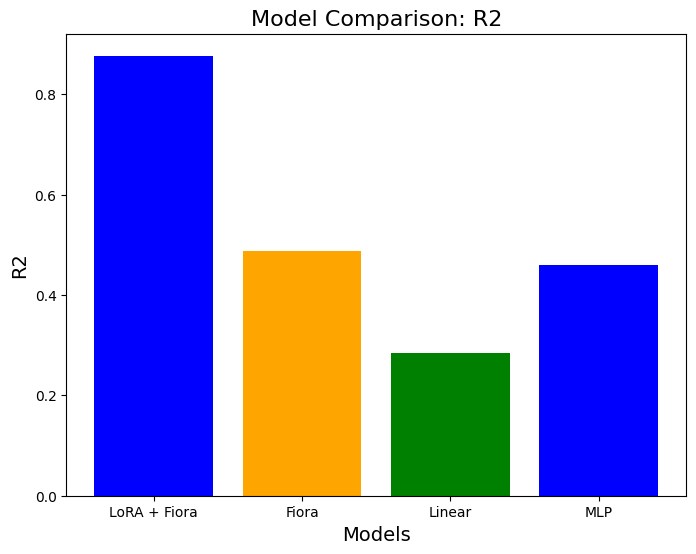

In [94]:
compare_models_barplot(["LoRA + Fiora", "Fiora", "Linear", "MLP"], [test_stats_lora_fiora, test_stats_fiora, test_stats_linear, test_stats_mlp], "r2")

In [95]:
filtered_test_stats_lora_fiora = test_stats_lora_fiora.copy()
filtered_test_stats_fiora = test_stats_fiora.copy()
filtered_test_stats_linear = test_stats_linear.copy()
filtered_test_stats_mlp = test_stats_mlp.copy()

# Delete unwanted keys
for key in ['mae', 'mse', 'r2', 'pearson']:
    filtered_test_stats_lora_fiora.pop(key, None)
    filtered_test_stats_fiora.pop(key, None)
    filtered_test_stats_linear.pop(key, None)
    filtered_test_stats_mlp.pop(key, None)

# Create a DataFrame that includes prediction and target CCS, as well as smiles
test_df_lora_fiora = pd.DataFrame({key: np.array(value).flatten() for key, value in filtered_test_stats_lora_fiora.items()})
test_df_fiora = pd.DataFrame({key: np.array(value).flatten() for key, value in filtered_test_stats_fiora.items()})
test_df_linear = pd.DataFrame({key: np.array(value).flatten() for key, value in filtered_test_stats_linear.items()})
test_df_mlp = pd.DataFrame({key: np.array(value).flatten() for key, value in filtered_test_stats_mlp.items()})



In [96]:
test_df_fiora['rare_element_included'] = test_df_fiora['smiles'].apply(rare_element_included_smiles)

In [97]:
test_df_fiora['residuals'] = (test_df_fiora['predictions'] - test_df_fiora['targets']).abs()

test_stats_lora_fiora['residuals'] = (test_df_lora_fiora['predictions'] - test_df_lora_fiora['targets']).abs()

In [98]:
test_df_fiora.head(10)

predictions     targets                                             smiles  \
0   216.163742  215.240005  Cc1ccc(cc1)n1nnnc1SCC(=O)N(c1ccc2c(c1)OCCO2)Cc...   
1   212.879791  210.649994  COc1ccc(cc1)c1nn(cc1C(=O)OCC(=O)c1ccccc1)c1ccccc1   
2   185.736084  169.889999               Clc1ncccc1S(=O)(=O)Nc1ccccc1c1ccccc1   
3   213.806793  203.990005  O=C(C1CCN(CC1)C(=O)CCn1nc(oc1=O)c1cccs1)Nc1ccc...   
4   187.023651  180.759995             O=C(N1CCCC1c1cccs1)Cn1cnc2c(c1=O)cccc2   
5   181.252243  167.710007              N#Cc1ccc(cc1)S(=O)(=O)N1CCc2c(C1)ccs2   
6   175.756470  165.429993              CCCn1c(=S)[nH]c2c(c1=O)cc1c(c2)OCCCO1   
7   210.745056  180.089996        COc1cc(OC)cc(c1)C(=O)N(CCc1ccc(c(c1)OC)OC)C   
8   187.511887  183.139999              O=C(c1ccc(cc1)NC(=O)c1ccco1)Nc1ccncc1   
9   165.144241  147.960007                          Clc1ccnc(c1)C(=O)Nc1nccs1   

   precursor_positive  ring_counts  presence_rare_elements  \
0                True            5                   False   
1                True            4                   False   
2                True            3                   False   
3                True            5                   False   
4                True            4                   False   
5                True            3                    True   
6                True            3                    True   
7                True            2                   False   
8                True            3                   False   
9                True            2                   False   

   rare_element_included  residuals  
0                  False   0.923737  
1                  False   2.229797  
2                  False  15.846085  
3                  False   9.816788  
4                  False   6.263657  
5                   True  13.542236  
6                   True  10.326477  
7                  False  30.655060  
8                  False   4.371887  
9                  False  17.184235

In [99]:
test_df_lora_fiora.head(10)

predictions     targets                                             smiles  \
0   214.638962  215.240005  Cc1ccc(cc1)n1nnnc1SCC(=O)N(c1ccc2c(c1)OCCO2)Cc...   
1   209.737411  210.649994  COc1ccc(cc1)c1nn(cc1C(=O)OCC(=O)c1ccccc1)c1ccccc1   
2   176.077805  169.889999               Clc1ncccc1S(=O)(=O)Nc1ccccc1c1ccccc1   
3   206.821671  203.990005  O=C(C1CCN(CC1)C(=O)CCn1nc(oc1=O)c1cccs1)Nc1ccc...   
4   178.808792  180.759995             O=C(N1CCCC1c1cccs1)Cn1cnc2c(c1=O)cccc2   
5   171.915634  167.710007              N#Cc1ccc(cc1)S(=O)(=O)N1CCc2c(C1)ccs2   
6   164.695648  165.429993              CCCn1c(=S)[nH]c2c(c1=O)cc1c(c2)OCCCO1   
7   179.088211  180.089996        COc1cc(OC)cc(c1)C(=O)N(CCc1ccc(c(c1)OC)OC)C   
8   183.180374  183.139999              O=C(c1ccc(cc1)NC(=O)c1ccco1)Nc1ccncc1   
9   151.224426  147.960007                          Clc1ccnc(c1)C(=O)Nc1nccs1   

   precursor_positive  ring_counts  presence_rare_elements  
0                True            5                   False  
1                True            4                   False  
2                True            3                   False  
3                True            5                   False  
4                True            4                   False  
5                True            3                    True  
6                True            3                    True  
7                True            2                   False  
8                True            3                   False  
9                True            2                   False

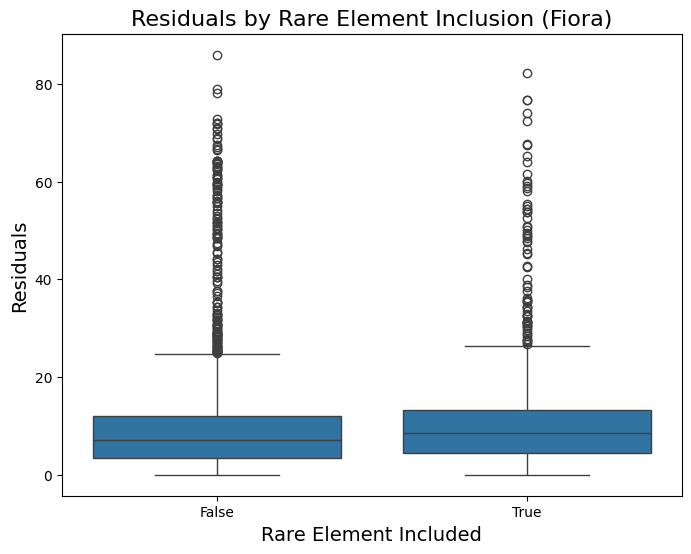

In [100]:
# Create a boxplot for residuals grouped by rare_element_included column
plt.figure(figsize=(8, 6))
sns.boxplot(x='rare_element_included', y='residuals', data=test_df_fiora)

plt.xlabel('Rare Element Included')
plt.ylabel('Residuals')
plt.title('Residuals by Rare Element Inclusion (Fiora)')

plt.show()

In [101]:
def count_rare_elements_in_smiles(smiles, element=None):
    rare_elements = fiora.MOL.constants.RARE_ELEMENTS

    if element:
        # Count only the specified element
        return int(bool(re.search(rf'\b{element}\b', smiles)))  # Returns 1 if present, 0 otherwise
    else:
        # Count all rare elements
        return sum(1 for elem in rare_elements if re.search(rf'\b{elem}\b', smiles))

# Add a new column 'rare_element_count' to store the count of rare elements in each smile string
test_df_fiora['rare_element_count'] = test_df_fiora['smiles'].apply(count_rare_elements_in_smiles)

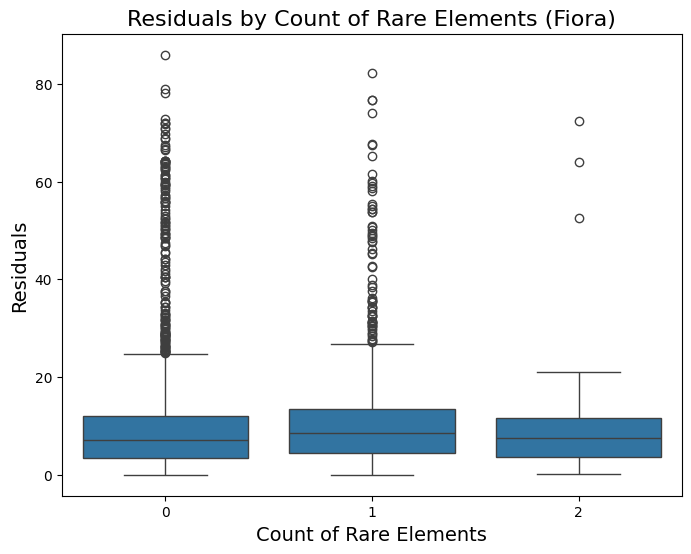

In [102]:
# Create a boxplot for residuals based on the number of rare elements
plt.figure(figsize=(8, 6))
sns.boxplot(x='rare_element_count', y='residuals', data=test_df_fiora)

plt.xlabel('Count of Rare Elements')
plt.ylabel('Residuals')
plt.title('Residuals by Count of Rare Elements (Fiora)')

plt.show()

In [103]:
from rdkit import Chem
from rdkit.Chem import Draw

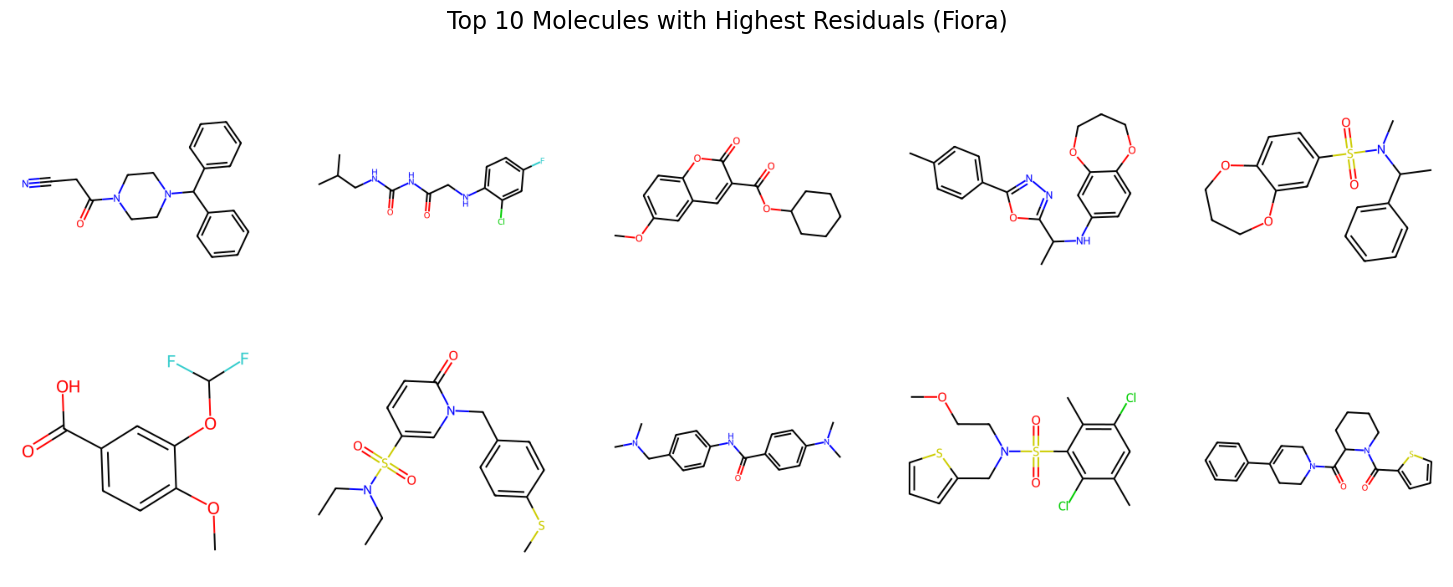

In [104]:
top_10_error_smiles = test_df_fiora.nlargest(10, 'residuals')['smiles']

molecule_images = []

# Create a molecule image for each smiles
for smiles in top_10_error_smiles:
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    molecule_images.append(img)

# Plot the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()  # Flatten the 2x5 grid of axes

# Plot each molecule image in the grid
for i, img in enumerate(molecule_images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axes

plt.suptitle('Top 10 Molecules with Highest Residuals (Fiora)', fontsize=17)

plt.tight_layout()
plt.show()

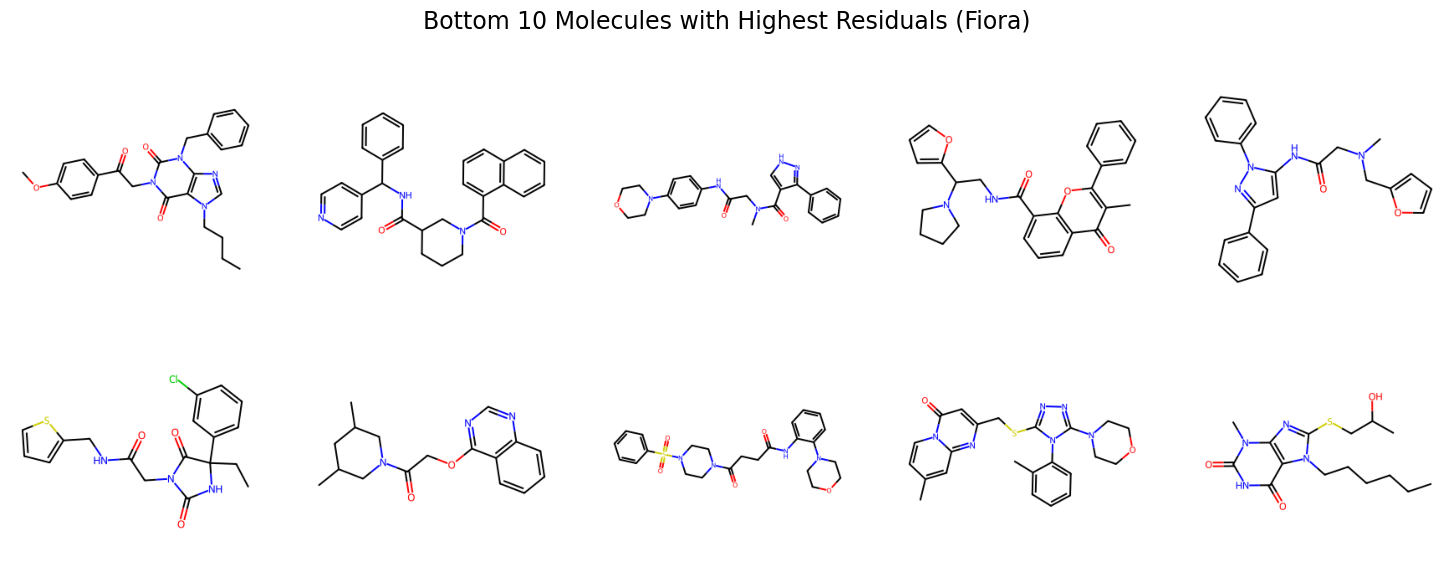

In [105]:
bottom_10_error_smiles = test_df_fiora.nsmallest(10, 'residuals')['smiles']

molecule_images = []

# Create a molecule image for each smiles
for smiles in bottom_10_error_smiles:
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    molecule_images.append(img)

# Plot the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()  # Flatten the 2x5 grid of axes

# Plot each molecule image in the grid
for i, img in enumerate(molecule_images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axes

plt.suptitle('Bottom 10 Molecules with Highest Residuals (Fiora)', fontsize=17)

plt.tight_layout()
plt.show()

In [106]:
rare_element_ratio_all = test_df_fiora['rare_element_count'].mean()
print(f"Rare element count mean for all {len(test_df_fiora)} rows: {rare_element_ratio_all:.4f}")

top_30_errors = test_df_fiora.nlargest(30, 'residuals')['rare_element_count']

# Calculate the ratio of rare elements included in the top 100 errors
rare_element_ratio_top_30 = top_30_errors.mean()
print(f"Rare element count mean for top 30 errors: {rare_element_ratio_top_30:.4f}")

Rare element count mean for all 4389 rows: 0.3616
Rare element count mean for top 30 errors: 0.3667


In [107]:
from collections import Counter

element_counts = Counter()

for _, row in ccs_df.iterrows():
    elem_distr = row["Metabolite"].calc_abs_elem_distr()
    element_counts.update(elem_distr)

element_df = pd.DataFrame.from_dict(element_counts, orient='index', columns=['Count'])
element_df = element_df.sort_values(by='Count', ascending=False)

In [108]:
# Check if pos and neg have similar R2 scores for Fiora

positive_df = test_df_fiora[test_df_fiora["precursor_positive"] == True]
negative_df = test_df_fiora[test_df_fiora["precursor_positive"] == False]

# Compute R² Score for each group
r2_positive = r2_score(positive_df["targets"], positive_df["predictions"])
r2_negative = r2_score(negative_df["targets"], negative_df["predictions"])

# Print results
print(f"R² Score for Positive Precursor Adduct: {r2_positive:.4f}")
print(f"R² Score for Negative Precursor Adduct: {r2_negative:.4f}")


R² Score for Positive Precursor Adduct: 0.4089
R² Score for Negative Precursor Adduct: 0.6181


In [109]:
# Weight vs. CCS (target) of test set
# extract weight from SMILES

test_df_fiora["Metabolite"] = test_df_fiora["smiles"].apply(Metabolite)
test_df_fiora["Weight"] = test_df_fiora["Metabolite"].apply(lambda x: x.ExactMolWeight)

test_df_fiora["MSE"] = (test_df_fiora["targets"] - test_df_fiora["predictions"]) ** 2
test_df_linear["MSE"] = (test_df_linear["targets"] - test_df_linear["predictions"]) ** 2
test_df_mlp["MSE"] = (test_df_mlp["targets"] - test_df_mlp["predictions"]) ** 2



[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] WARNING: Omitted undefined stereo

[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01] DEPRECATION WARNING: please use MorganGenerator
[19:35:01]

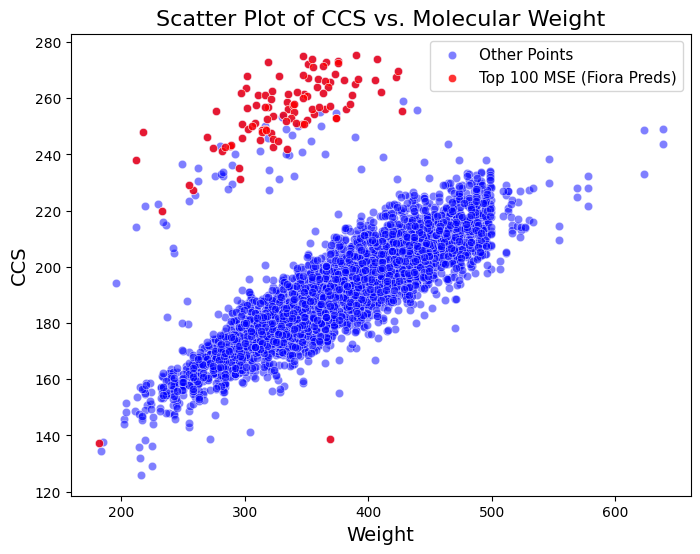

In [110]:
# Test Set: CCS vs. Weight

top_100_mse_fiora = test_df_fiora.nlargest(100, 'MSE')
top_100_mse_linear = test_df_linear.nlargest(100, 'MSE')
top_100_mse_mlp = test_df_mlp.nlargest(100, 'MSE')

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_fiora,
    x="Weight",
    y="targets",
    alpha=0.5,
    color="blue",
    label="Other Points"
)
sns.scatterplot(
    data=top_100_mse_fiora,
    x="Weight",
    y="targets",
    alpha=0.8,
    color="red",
    label="Top 100 MSE (Fiora Preds)"
)
plt.xlabel("Weight")
plt.ylabel("CCS")
plt.title("Scatter Plot of CCS vs. Molecular Weight")
plt.show()

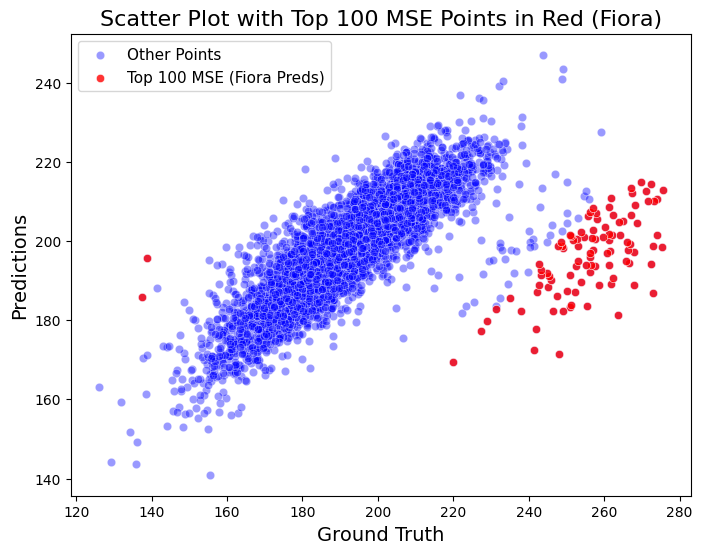

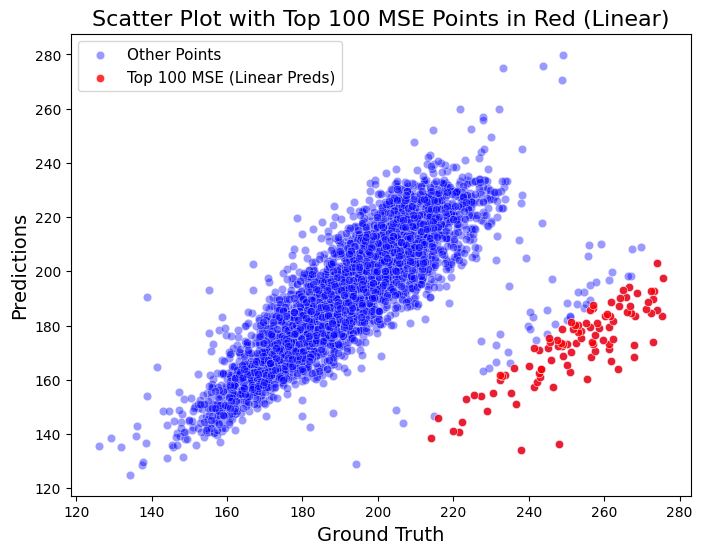

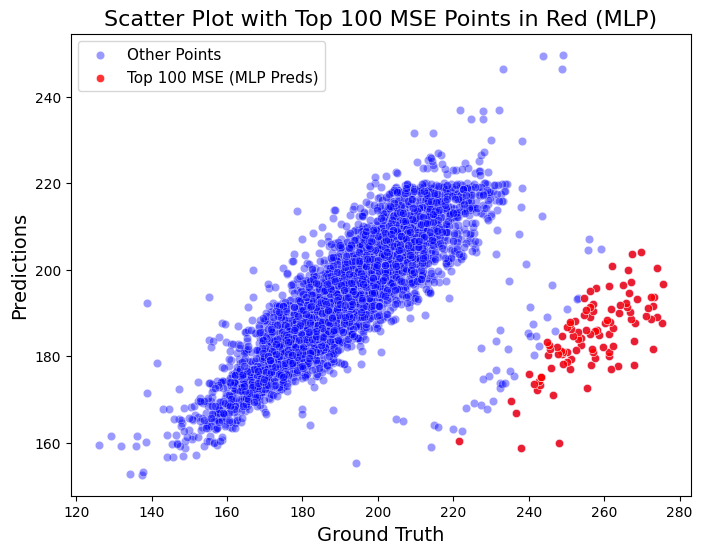

In [111]:
# Fiora
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_fiora,
    x="targets",
    y="predictions",
    alpha=0.4,
    color="blue",
    label="Other Points"
)
# Plot the top 100 MSE points in red
sns.scatterplot(
    data=top_100_mse_fiora,
    x="targets",
    y="predictions",
    alpha=0.8,
    color="red",
    label="Top 100 MSE (Fiora Preds)"
)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Scatter Plot with Top 100 MSE Points in Red (Fiora)")
plt.legend()
plt.show()

# Linear
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_linear,
    x="targets",
    y="predictions",
    alpha=0.4,
    color="blue",
    label="Other Points"
)
sns.scatterplot(
    data=top_100_mse_linear,
    x="targets",
    y="predictions",
    alpha=0.8,
    color="red",
    label="Top 100 MSE (Linear Preds)"
)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Scatter Plot with Top 100 MSE Points in Red (Linear)")
plt.legend()
plt.show()

# MLP
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_mlp,
    x="targets",
    y="predictions",
    alpha=0.4,
    color="blue",
    label="Other Points"
)
sns.scatterplot(
    data=top_100_mse_mlp,
    x="targets",
    y="predictions",
    alpha=0.8,
    color="red",
    label="Top 100 MSE (MLP Preds)"
)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Scatter Plot with Top 100 MSE Points in Red (MLP)")
plt.legend()
plt.show()

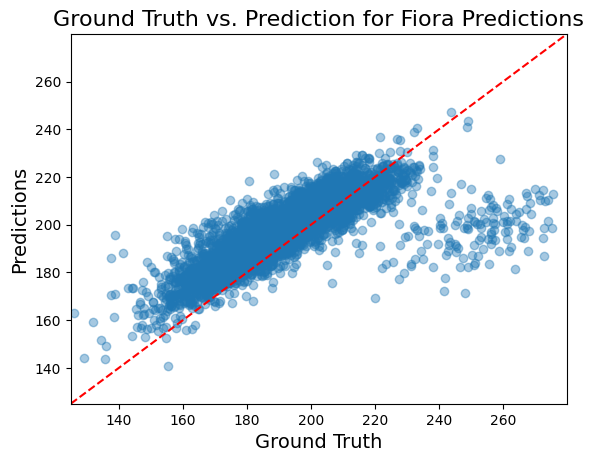

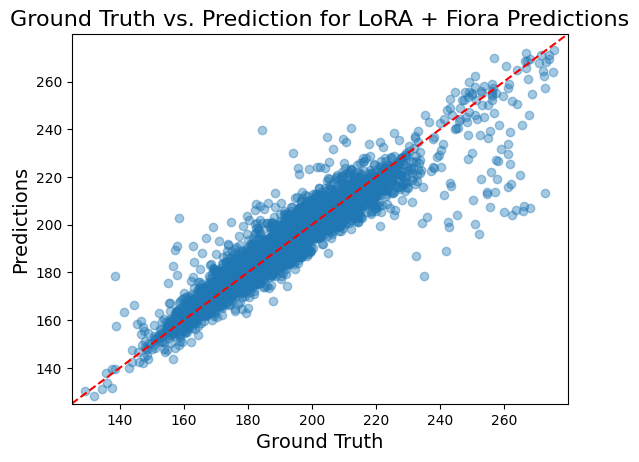

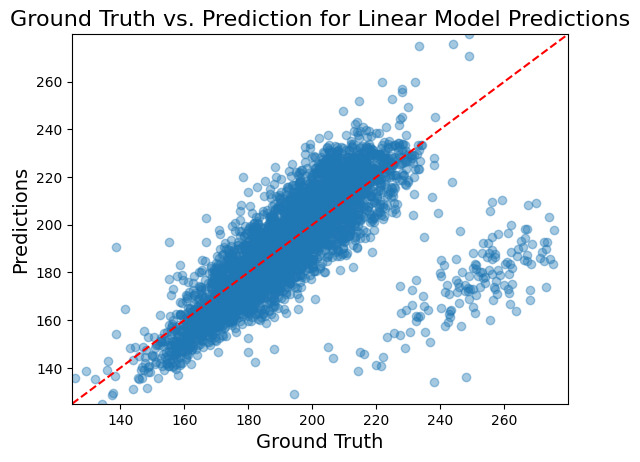

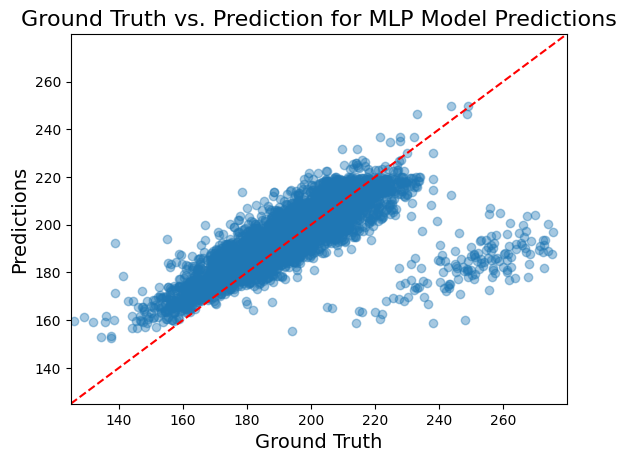

In [112]:
# Fiora Ground Truth vs. Prediction

plt.scatter(test_stats_fiora["targets"], test_stats_fiora["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for Fiora Predictions")
plt.show()

# LoRA + Fiora Ground Truth vs. Prediction

plt.scatter(test_stats_lora_fiora["targets"], test_stats_lora_fiora["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for LoRA + Fiora Predictions")
plt.show()

# Linear Model Ground Truth vs. Prediction

plt.scatter(test_stats_linear["targets"], test_stats_linear["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for Linear Model Predictions")
plt.show()

# MLP Ground Truth vs. Prediction

plt.scatter(test_stats_mlp["targets"], test_stats_mlp["predictions"], alpha=0.4)
plt.plot([global_min, global_max], [global_min, global_max], 'r--')
plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs. Prediction for MLP Model Predictions")
plt.show()

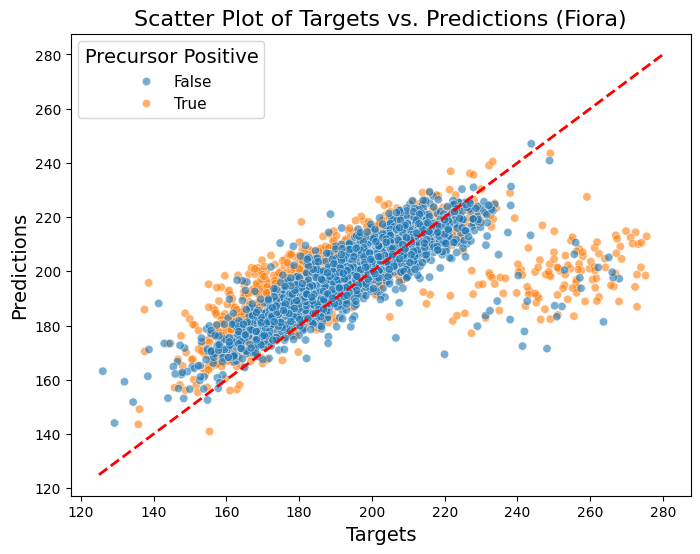

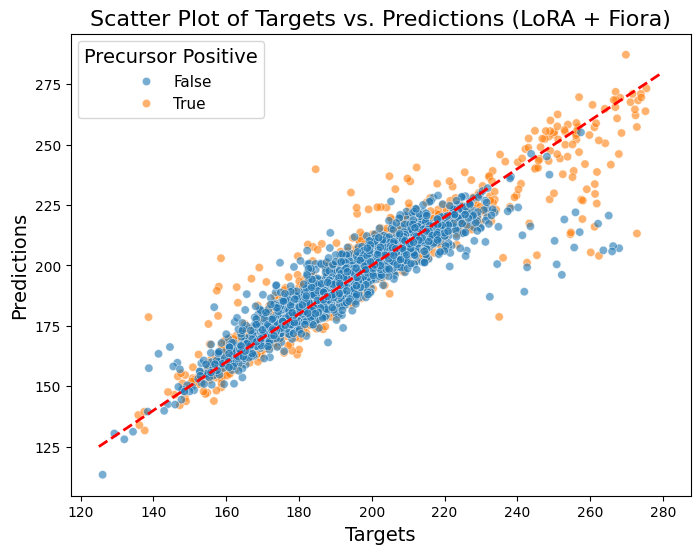

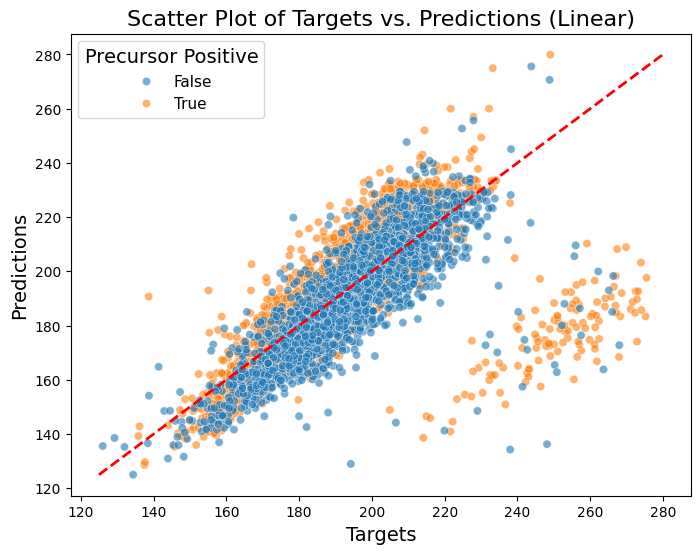

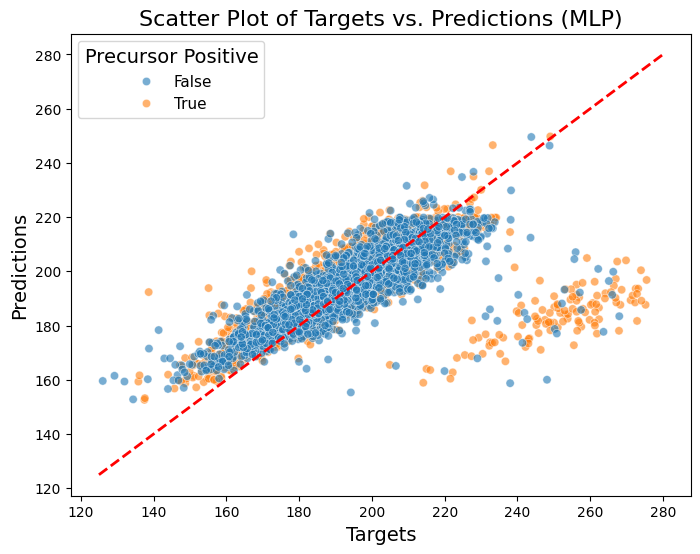

In [113]:
# Fiora
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_fiora,
    x="targets",
    y="predictions",
    hue="precursor_positive",
    alpha=0.6,
)
plt.plot([global_min, global_max], [global_min, global_max], color="red", linestyle="--", linewidth=2)
plt.xlabel("Targets")
plt.ylabel("Predictions")
plt.title("Scatter Plot of Targets vs. Predictions (Fiora)")
plt.legend(title="Precursor Positive")
plt.show()

# LoRA + Fiora
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_lora_fiora,
    x="targets",
    y="predictions",
    hue="precursor_positive",
    alpha=0.6,
)
plt.plot([global_min, global_max], [global_min, global_max], color="red", linestyle="--", linewidth=2)
plt.xlabel("Targets")
plt.ylabel("Predictions")
plt.title("Scatter Plot of Targets vs. Predictions (LoRA + Fiora)")
plt.legend(title="Precursor Positive")
plt.show()

# Linear
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_linear,
    x="targets",
    y="predictions",
    hue="precursor_positive",
    alpha=0.6,
)
plt.plot([global_min, global_max], [global_min, global_max], color="red", linestyle="--", linewidth=2)
plt.xlabel("Targets")
plt.ylabel("Predictions")
plt.title("Scatter Plot of Targets vs. Predictions (Linear)")
plt.legend(title="Precursor Positive")
plt.show()

# MLP
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=test_df_mlp,
    x="targets",
    y="predictions",
    hue="precursor_positive",
    alpha=0.6,
)
plt.plot([global_min, global_max], [global_min, global_max], color="red", linestyle="--", linewidth=2)
plt.xlabel("Targets")
plt.ylabel("Predictions")
plt.title("Scatter Plot of Targets vs. Predictions (MLP)")
plt.legend(title="Precursor Positive")
plt.show()

In [114]:
# Find 2 Molecules with Similar Weights but Different CCS Values

threshold_weight = 1

def find_rows(df):
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if abs(df['Weight'][i] - df['Weight'][j]) < 1 and abs(df['targets'][i] - df['targets'][j]) > 20:
                return (i,j)
    return None

# Find the rows
result_rows = find_rows(test_df_fiora)

# Print the result
if result_rows is not None:
    print(result_rows)  # 1,230
else:
    print("No such rows found.")


(1, 230)


In [115]:
first_molecule = test_df_fiora.iloc[result_rows[0]].copy()
second_molecule = test_df_fiora.iloc[result_rows[1]].copy()

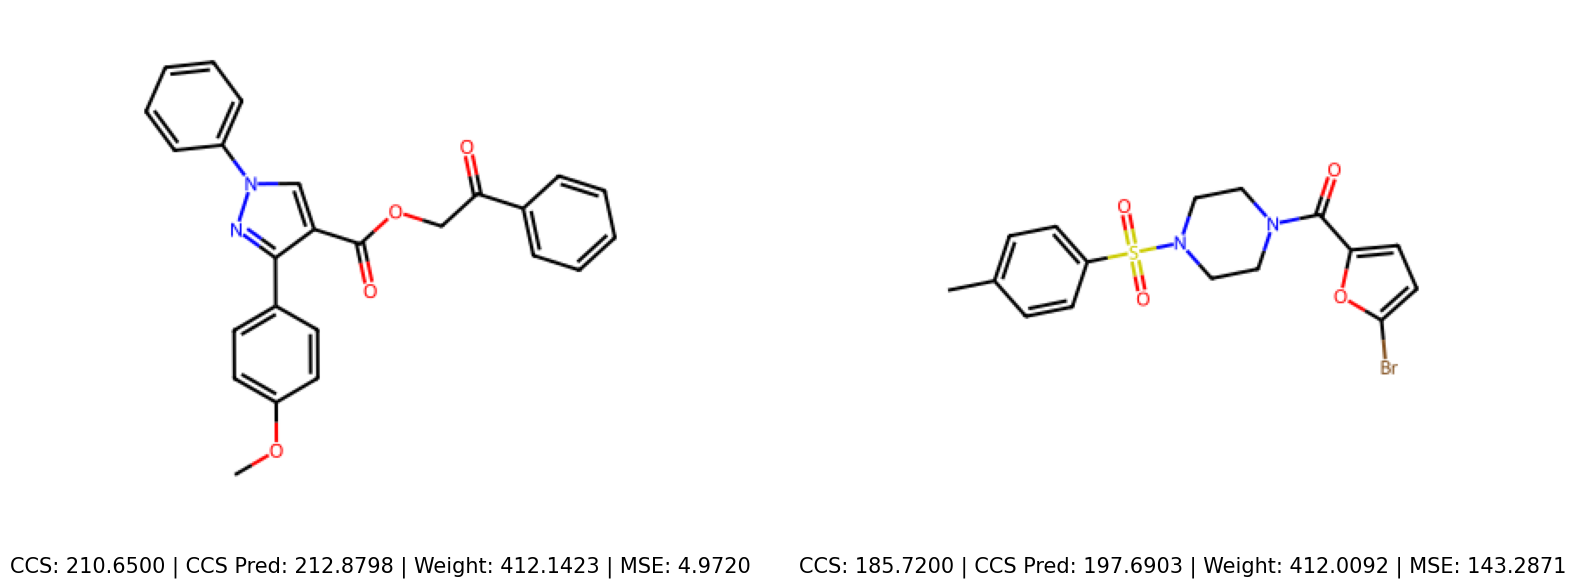

In [116]:
# Draw Example Molecules that have similar weight but different CCS

first_smiles = first_molecule["smiles"]
second_smiles = second_molecule["smiles"]

first_weight = first_molecule["Weight"]
second_weight = second_molecule["Weight"]

first_ccs = first_molecule["targets"]
second_ccs = second_molecule["targets"] 

first_pred = first_molecule["predictions"]
second_pred = second_molecule["predictions"]
first_mse = (first_ccs - first_pred) ** 2
second_mse = (second_ccs - second_pred) ** 2

mol_images = []

mol1 = Chem.MolFromSmiles(first_smiles)
img1 = Draw.MolToImage(mol1)
mol_images.append(img1)

mol2 = Chem.MolFromSmiles(second_smiles)
img2 = Draw.MolToImage(mol2)
mol_images.append(img2)


# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

for i, ax in enumerate(axes):  # No need to use flatten()
    ax.imshow(mol_images[i])
    ax.axis('off')

    # Annotate with CCS, Weight, and MSE
    if i == 0:
        text = f"CCS: {first_ccs:.4f} | CCS Pred: {first_pred:.4f} | Weight: {first_weight:.4f} | MSE: {first_mse:.4f}" 
        # text = f"CCS: {first_ccs:.4f} | Weight: {first_weight:.4f}" 
    else:
        text = f"CCS: {second_ccs:.4f} | CCS Pred: {second_pred:.4f} | Weight: {second_weight:.4f} | MSE: {second_mse:.4f}"
        # text = f"CCS: {second_ccs:.4f} | Weight: {second_weight:.4f}" 

    # Add the text below each image
    ax.text(0.5, -0.05, text, ha='center', va='top', transform=ax.transAxes, fontsize=15)

plt.tight_layout(pad=0.9, w_pad=2.0)
plt.show()

In [117]:
test_df_fiora["precursor_positive"].value_counts()

precursor_positive
True     2575
False    1814
Name: count, dtype: int64

In [118]:
test_stats_fiora

{'mae': tensor(9.9885, device='cuda:0'),
 'mse': tensor(208.3741, device='cuda:0'),
 'pearson': tensor(0.7389, device='cuda:0'),
 'r2': tensor(0.4877, device='cuda:0'),
 'predictions': array([[216.16374],
        [212.87979],
        [185.73608],
        ...,
        [199.29155],
        [176.3978 ],
        [201.50449]], dtype=float32),
 'targets': array([[215.24],
        [210.65],
        [169.89],
        ...,
        [192.13],
        [170.42],
        [198.31]], dtype=float32),
 'smiles': ['Cc1ccc(cc1)n1nnnc1SCC(=O)N(c1ccc2c(c1)OCCO2)Cc1cccs1',
  'COc1ccc(cc1)c1nn(cc1C(=O)OCC(=O)c1ccccc1)c1ccccc1',
  'Clc1ncccc1S(=O)(=O)Nc1ccccc1c1ccccc1',
  'O=C(C1CCN(CC1)C(=O)CCn1nc(oc1=O)c1cccs1)Nc1ccc2c(c1)OCO2',
  'O=C(N1CCCC1c1cccs1)Cn1cnc2c(c1=O)cccc2',
  'N#Cc1ccc(cc1)S(=O)(=O)N1CCc2c(C1)ccs2',
  'CCCn1c(=S)[nH]c2c(c1=O)cc1c(c2)OCCCO1',
  'COc1cc(OC)cc(c1)C(=O)N(CCc1ccc(c(c1)OC)OC)C',
  'O=C(c1ccc(cc1)NC(=O)c1ccco1)Nc1ccncc1',
  'Clc1ccnc(c1)C(=O)Nc1nccs1',
  'COc1cc2c(cc1OC)CCN(C2c1ccccc

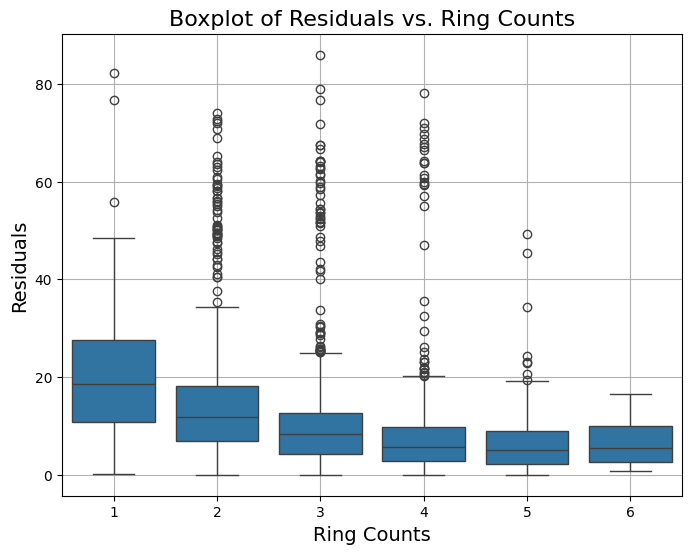

In [119]:
# plot ring_count vs. Residual (Fiora)

ring_counts = [tensor.item() for tensor in test_stats_fiora["ring_counts"]]

predictions = test_stats_fiora["predictions"].flatten()
targets = test_stats_fiora["targets"].flatten()
residuals = np.abs(predictions - targets)

ring_count_res_df = pd.DataFrame({'Ring Count': ring_counts, 'Residuals': residuals})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Ring Count', y='Residuals', data=ring_count_res_df)

plt.xlabel("Ring Counts")
plt.ylabel("Residuals")
plt.title("Boxplot of Residuals vs. Ring Counts")

plt.grid(True)
plt.show()

In [120]:
test_df_fiora.head(10)

predictions     targets                                             smiles  \
0   216.163742  215.240005  Cc1ccc(cc1)n1nnnc1SCC(=O)N(c1ccc2c(c1)OCCO2)Cc...   
1   212.879791  210.649994  COc1ccc(cc1)c1nn(cc1C(=O)OCC(=O)c1ccccc1)c1ccccc1   
2   185.736084  169.889999               Clc1ncccc1S(=O)(=O)Nc1ccccc1c1ccccc1   
3   213.806793  203.990005  O=C(C1CCN(CC1)C(=O)CCn1nc(oc1=O)c1cccs1)Nc1ccc...   
4   187.023651  180.759995             O=C(N1CCCC1c1cccs1)Cn1cnc2c(c1=O)cccc2   
5   181.252243  167.710007              N#Cc1ccc(cc1)S(=O)(=O)N1CCc2c(C1)ccs2   
6   175.756470  165.429993              CCCn1c(=S)[nH]c2c(c1=O)cc1c(c2)OCCCO1   
7   210.745056  180.089996        COc1cc(OC)cc(c1)C(=O)N(CCc1ccc(c(c1)OC)OC)C   
8   187.511887  183.139999              O=C(c1ccc(cc1)NC(=O)c1ccco1)Nc1ccncc1   
9   165.144241  147.960007                          Clc1ccnc(c1)C(=O)Nc1nccs1   

   precursor_positive  ring_counts  presence_rare_elements  \
0                True            5                   False   
1                True            4                   False   
2                True            3                   False   
3                True            5                   False   
4                True            4                   False   
5                True            3                    True   
6                True            3                    True   
7                True            2                   False   
8                True            3                   False   
9                True            2                   False   

   rare_element_included  residuals  rare_element_count  \
0                  False   0.923737                   0   
1                  False   2.229797                   0   
2                  False  15.846085                   0   
3                  False   9.816788                   0   
4                  False   6.263657                   0   
5                   True  13.542236                   1   
6                   True  10.326477                   1   
7                  False  30.655060                   0   
8                  False   4.371887                   0   
9                  False  17.184235                   0   

                                          Metabolite      Weight         MSE  
0  <Metabolite: Cc1ccc(cc1)n1nnnc1SCC(=O)N(c1ccc2...  479.108582    0.853289  
1  <Metabolite: COc1ccc(cc1)c1nn(cc1C(=O)OCC(=O)c...  412.142307    4.971996  
2  <Metabolite: Clc1ncccc1S(=O)(=O)Nc1ccccc1c1ccc...  344.038626  251.098404  
3  <Metabolite: O=C(C1CCN(CC1)C(=O)CCn1nc(oc1=O)c...  470.126005   96.369324  
4  <Metabolite: O=C(N1CCCC1c1cccs1)Cn1cnc2c(c1=O)...  339.104148   39.233395  
5  <Metabolite: N#Cc1ccc(cc1)S(=O)(=O)N1CCc2c(C1)...  304.034020  183.392166  
6  <Metabolite: CCCn1c(=S)[nH]c2c(c1=O)cc1c(c2)OC...  292.088163  106.636131  
7  <Metabolite: COc1cc(OC)cc(c1)C(=O)N(CCc1ccc(c(...  359.173273  939.732666  
8  <Metabolite: O=C(c1ccc(cc1)NC(=O)c1ccco1)Nc1cc...  307.095691   19.113398  
9            <Metabolite: Clc1ccnc(c1)C(=O)Nc1nccs1>  238.992010  295.297913

In [121]:
# Analyze clusters in test_df_fiora

# Standardize the data
X = ccs_df[['weights', 'CCS_AVG']].values
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN clustering
clustering = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
ccs_df['cluster'] = clustering.labels_  # -1 is noise, 0/1 are clusters

In [122]:
# TODO: find superclasses of metabolites and analyze them according to superclass clusters

# ClassyFire
# test_df_fiora["group_id"] = test_df_fiora["smiles"].astype("category").cat.codes
# test_df_fiora.drop_duplicates("group_id", keep="first")[["group_id", "smiles"]].to_csv(f"../../data/ccs/benchmarking/classyfire_input.csv", header=None, sep=" ", index=False)

#NPClassifier (doesn't work)

import requests

def classify_np(smiles):
    try:
        response = requests.get(f"https://structure.gnps2.org/classyfire?smiles={smiles}", timeout=10)
        if response.status_code == 200:
            data = response.json()
            return data.get('superclass', None)
        else:
            return None
    except Exception as e:
        return None
    
superclasses = []
for i, s in enumerate(test_df_fiora['smiles']):
    if pd.isna(s):
        print("smiles NA")
        superclasses.append(None)
        continue
    superclass = classify_np(s)
    superclasses.append(superclass)

test_df_fiora['superclass'] = superclasses




KeyboardInterrupt: 